In [1]:


# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/air-quality-data-in-india/stations.csv
/kaggle/input/air-quality-data-in-india/station_hour.csv
/kaggle/input/air-quality-data-in-india/city_day.csv
/kaggle/input/air-quality-data-in-india/city_hour.csv
/kaggle/input/air-quality-data-in-india/station_day.csv


In [2]:
data=pd.read_csv('/kaggle/input/air-quality-data-in-india/city_day.csv')
data

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [3]:

data.drop(axis=1,columns=['Date']).describe(include='all')

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
count,29531,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000,24850
unique,26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
top,Ahmedabad,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Moderate
freq,2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8829
mean,NaN,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581,NaN
std,NaN,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585,NaN
min,NaN,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000,NaN
25%,NaN,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000,NaN
50%,NaN,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000,NaN
75%,NaN,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000,NaN


1. #### These are the things I wanted to do and check once I saw the data
1. ####  compare all pollutant levels with time for every city
1. ####  compare mean of pollutants with time for all cities 
1. ####  find min and max pollutant level consisting city
1. ####  find city having higer pollutant increate rate 
1. ####  find high pollutant level  period for all cities
1. ####  pie hart for no of days each city is in safe AQI limits
1. ####  find months having +ve pollutant increase rate(AQI) 
1. ####  DO clusterering and categorize cities 
1. ####  predict cities polutant levels for the future and find max polluted city

In [4]:
data.drop(axis=1,columns=['Date']).groupby(['City'])['AQI_Bucket'].agg(pd.Series.mode)

City
Ahmedabad                   Severe
Aizawl                        Good
Amaravati             Satisfactory
Amritsar              Satisfactory
Bengaluru             Satisfactory
Bhopal                    Moderate
Brajrajnagar              Moderate
Chandigarh            Satisfactory
Chennai               Satisfactory
Coimbatore            Satisfactory
Delhi                         Poor
Ernakulam             Satisfactory
Gurugram                  Moderate
Guwahati              Satisfactory
Hyderabad                 Moderate
Jaipur                    Moderate
Jorapokhar                Moderate
Kochi                 Satisfactory
Kolkata               Satisfactory
Lucknow                   Moderate
Mumbai                Satisfactory
Patna                     Moderate
Shillong                      Good
Talcher                   Moderate
Thiruvananthapuram    Satisfactory
Visakhapatnam             Moderate
Name: AQI_Bucket, dtype: object

### EDA

In [5]:
### PM 2.5 particle anlysis

In [6]:
 import seaborn as sns
# for i in data['City'].unique():
#     sns.displot(data=data[data['City']==i])

In [7]:
data['Date']=pd.to_datetime(data['Date'])
data.Date.dt.year

0        2015
1        2015
2        2015
3        2015
4        2015
         ... 
29526    2020
29527    2020
29528    2020
29529    2020
29530    2020
Name: Date, Length: 29531, dtype: int64

In [8]:
pm2=data.groupby(['City',(data.Date.dt.year), (data.Date.dt.month)])['PM2.5'].mean()

In [9]:
pm2.values

array([ 82.6825    , 116.1016    , 110.46933333, ...,  17.79580645,
        23.42166667,  15.        ])

In [10]:
# Checked pm2.5 levels mean for every month for ecery city
data_mean_month=pd.DataFrame({'City':[i[0] for i in pm2.index],'Date':[i[1] for i in pm2.index],'month':[i[2] for i in pm2.index],'pm2.5':pm2.values})
data_mean_month

,City,Date,month,pm2.5
0,Ahmedabad,2015,1,82.682500
1,Ahmedabad,2015,2,116.101600
2,Ahmedabad,2015,3,110.469333
3,Ahmedabad,2015,4,101.682000
4,Ahmedabad,2015,5,74.919355
...,...,...,...,...
1000,Visakhapatnam,2020,3,29.253226
1001,Visakhapatnam,2020,4,16.665000
1002,Visakhapatnam,2020,5,17.795806
1003,Visakhapatnam,2020,6,23.421667


In [11]:
# data['Date']=pd.to_datetime(data['Date'])
# (pd.to_datetime(df_sub['year'].astype(str)  + df_sub['Months'], format='%Y%B')

In [12]:
data_y=pd.to_datetime(data_mean_month['Date'].astype(str)+ '-'  + data_mean_month['month'].astype(int).astype(str)+'-1', format = '%Y-%m')

In [13]:
data_y

0      2015-01-01
1      2015-02-01
2      2015-03-01
3      2015-04-01
4      2015-05-01
          ...    
1000   2020-03-01
1001   2020-04-01
1002   2020-05-01
1003   2020-06-01
1004   2020-07-01
Length: 1005, dtype: datetime64[ns]

<AxesSubplot:ylabel='pm2.5'>

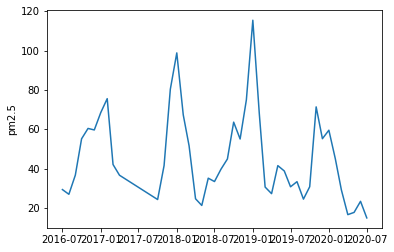

In [14]:
 sns.lineplot(y=data_mean_month[data_mean_month['City']=='Visakhapatnam']['pm2.5'],x=data_y )

In [15]:
# data preprocessing

In [16]:
columns=list(set(list(data.columns))-set(['City','AQI_Bucket','Date']))

> #  comparing all pollutant levels with time for every city
 

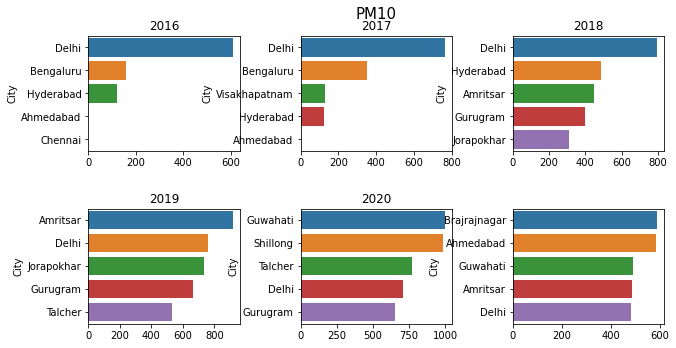

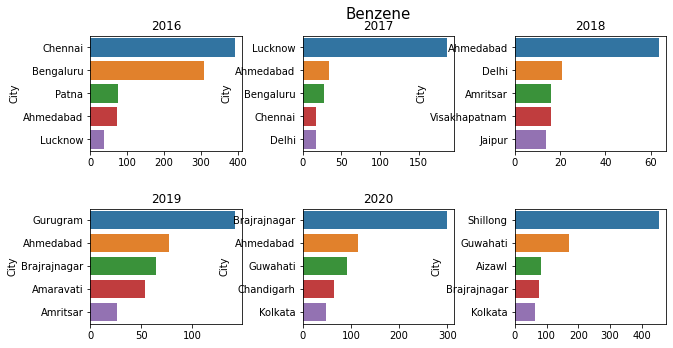

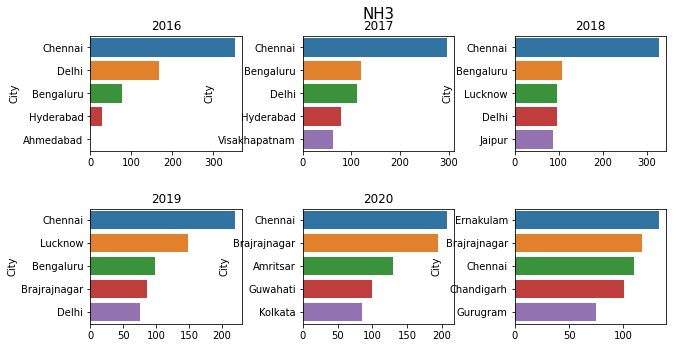

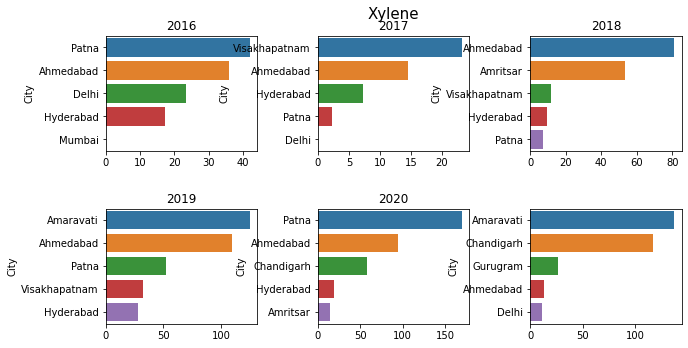

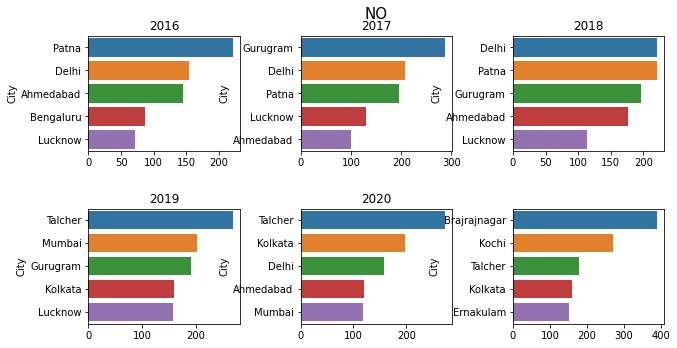

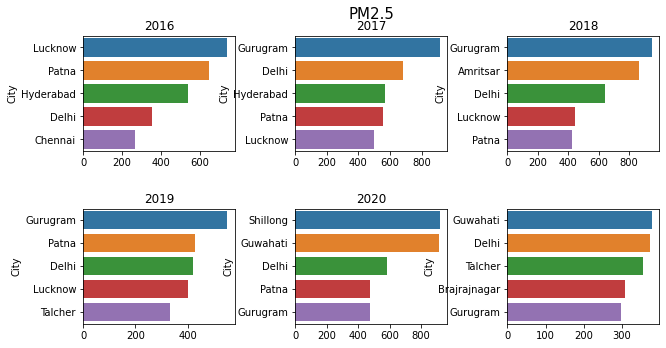

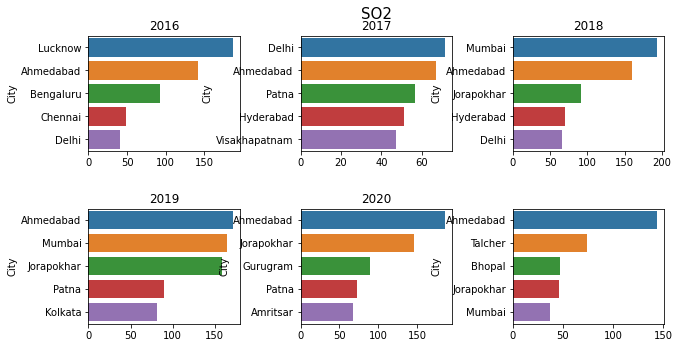

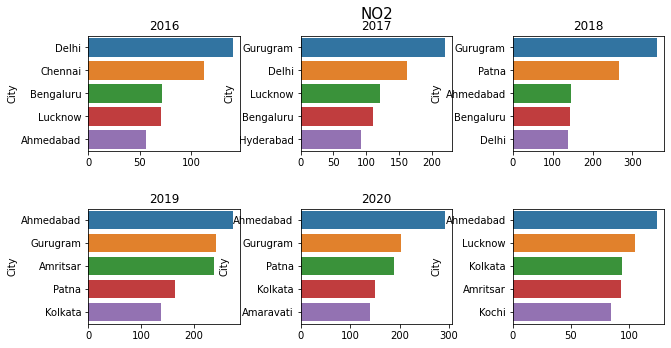

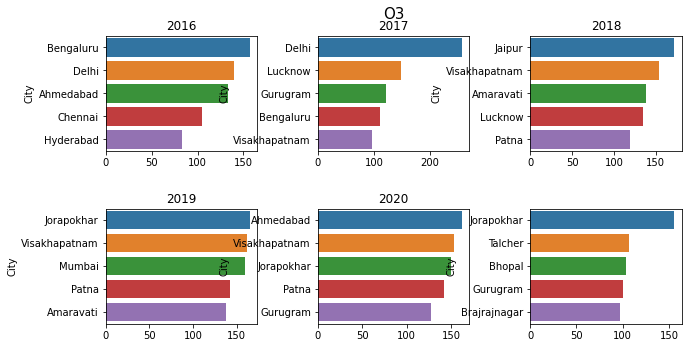

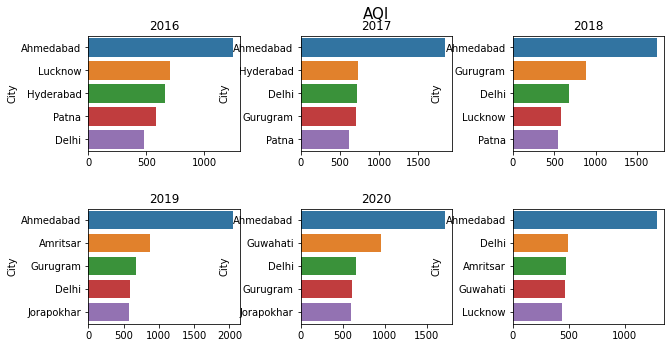

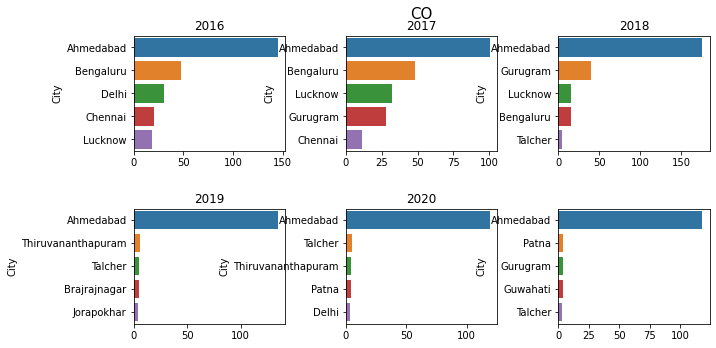

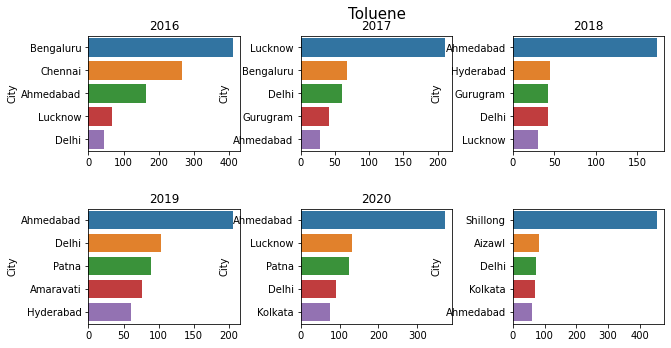

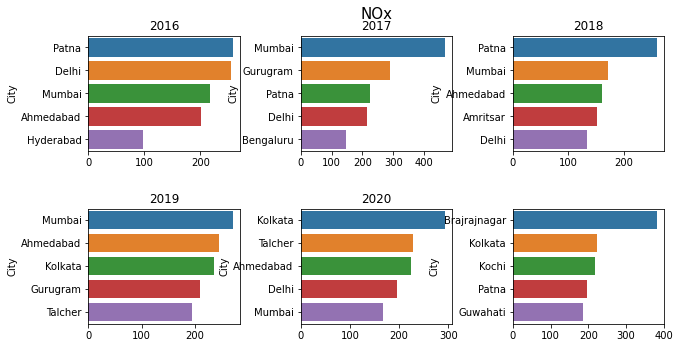

In [17]:
# Top 5 highest pm2.5 level cities over the years
import matplotlib.pyplot as plt

for j in columns :
    plt.figure(figsize = (10, 5))
    plt.suptitle(j, fontsize=15)
    for x,i in enumerate(data.Date.dt.year.unique()):
        plt.title(str(i))
        #sort(data[data[data.Date.dt.year]==i]['PM2.5'])
        df=data[data.Date.dt.year==i].groupby(['City'])[j].max().sort_values(ascending=False).head(5) 
        plt.subplot(2, 3, 1+x)
        plt.subplots_adjust(left=0.1,
                        bottom=0.1,
                        right=0.9,
                        top=0.9,
                        wspace=0.4,
                        hspace=0.5)
        sns.barplot( x=df.values, y=df.index)
    

    

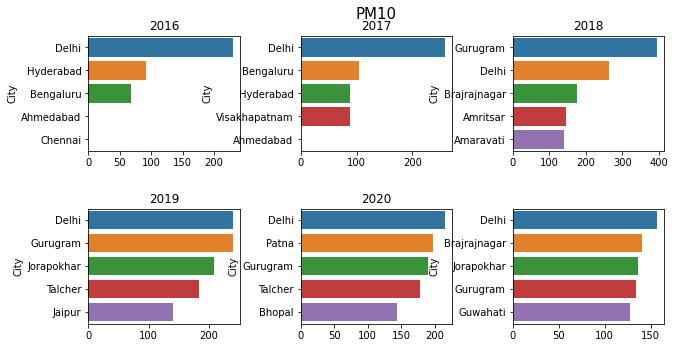

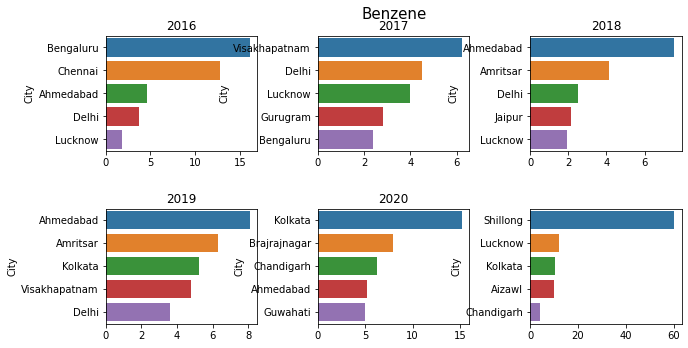

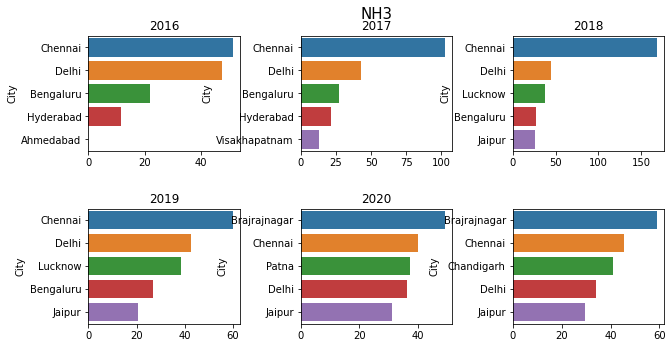

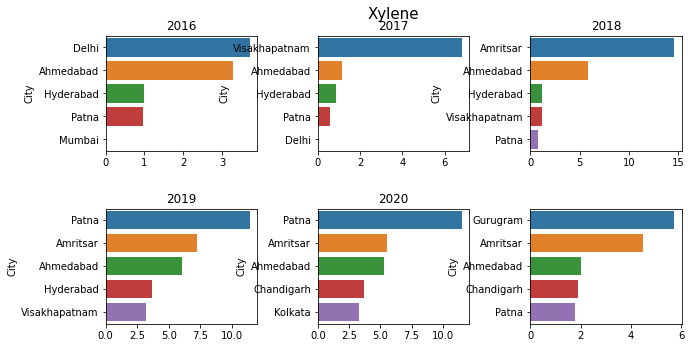

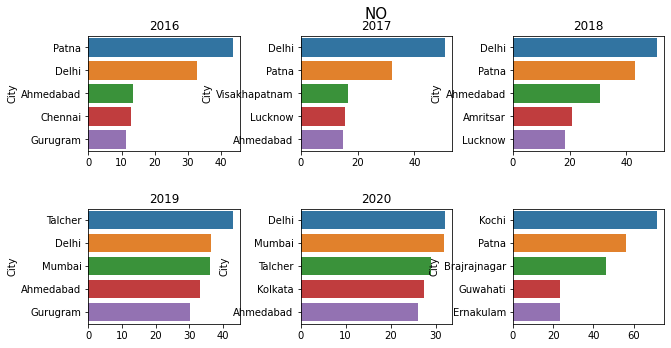

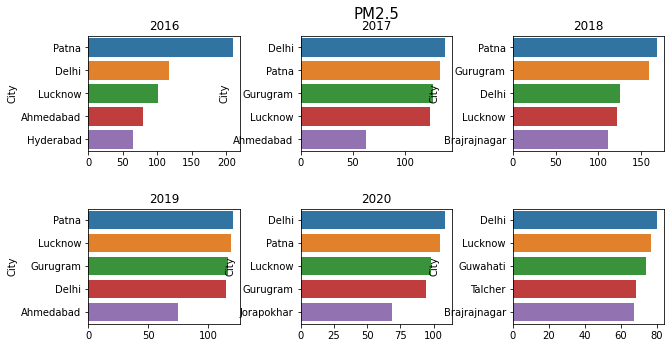

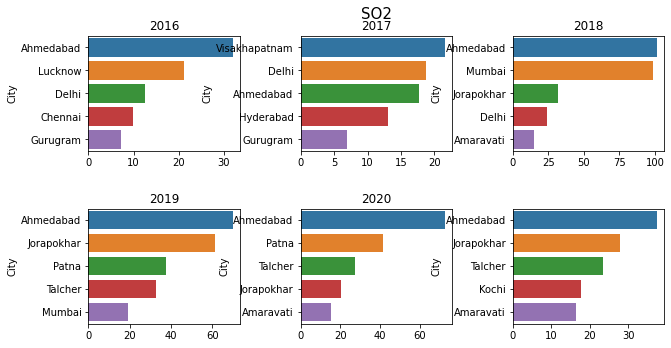

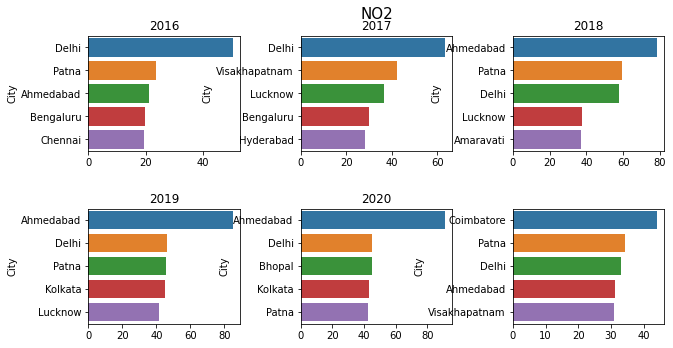

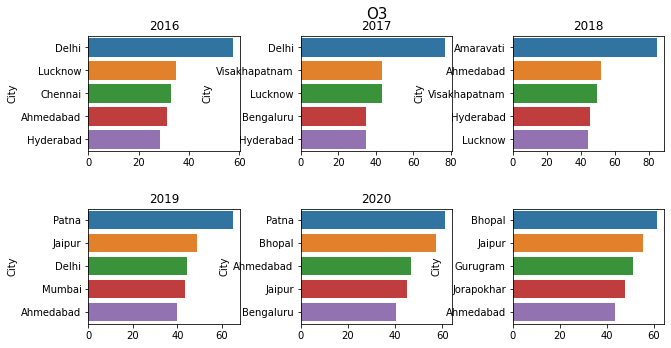

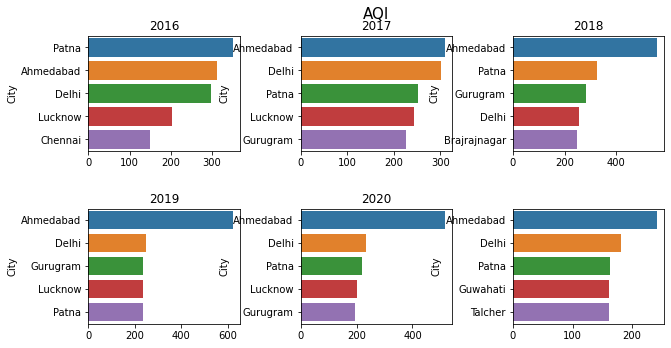

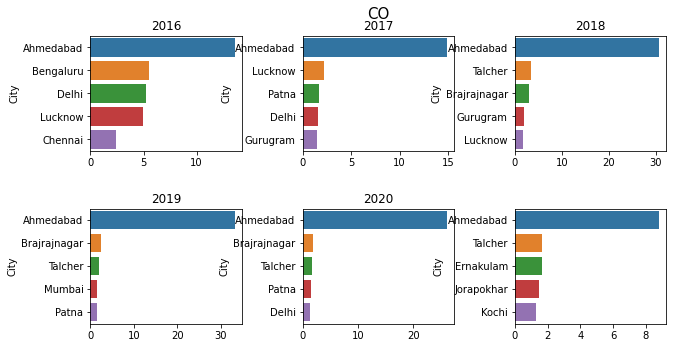

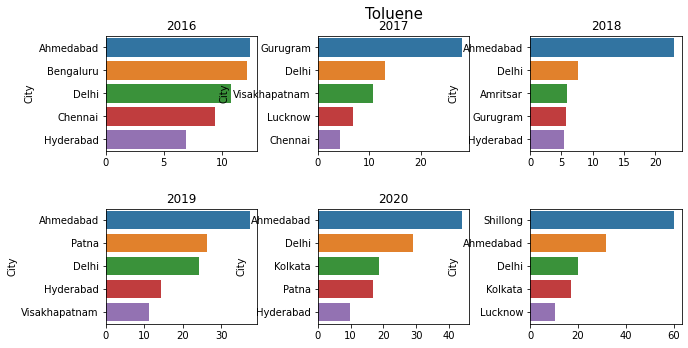

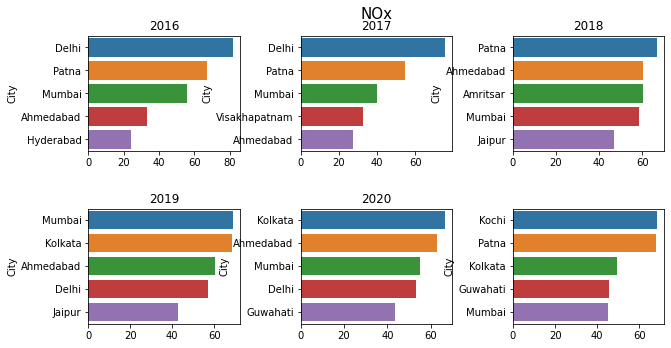

In [18]:
# Top 5 highest pm2.5  mean level cities over the years
import matplotlib.pyplot as plt

for j in columns :
    plt.figure(figsize = (10, 5))
    plt.suptitle(j, fontsize=15)
    for x,i in enumerate(data.Date.dt.year.unique()):
        plt.title(str(i))
        #sort(data[data[data.Date.dt.year]==i]['PM2.5'])
        df=data[data.Date.dt.year==i].groupby(['City'])[j].mean().sort_values(ascending=False).head(5) 
        plt.subplot(2, 3, 1+x)
        plt.subplots_adjust(left=0.1,
                        bottom=0.1,
                        right=0.9,
                        top=0.9,
                        wspace=0.4,
                        hspace=0.5)
        sns.barplot( x=df.values, y=df.index)
    
    
    

####  Delhi , Ahemedabad , Lucknow, Patna are most consistent in top 5  high mean AQI cities

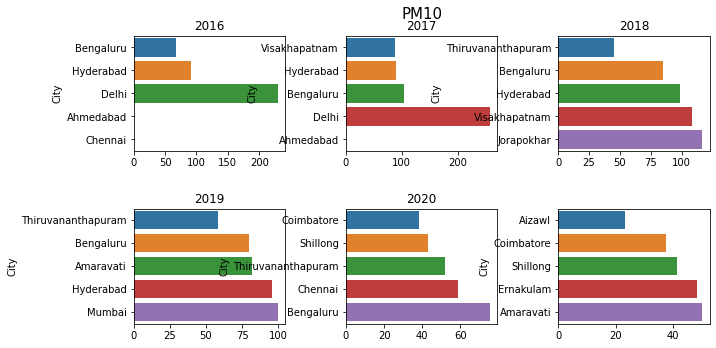

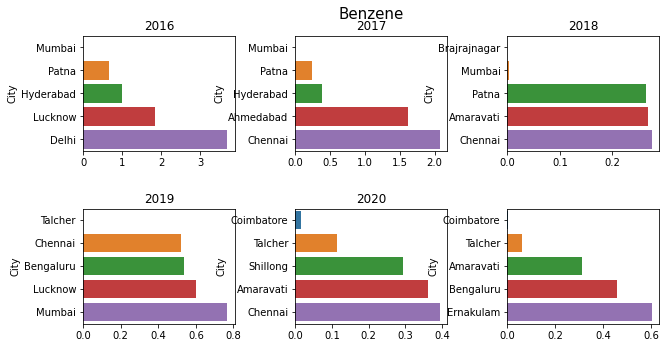

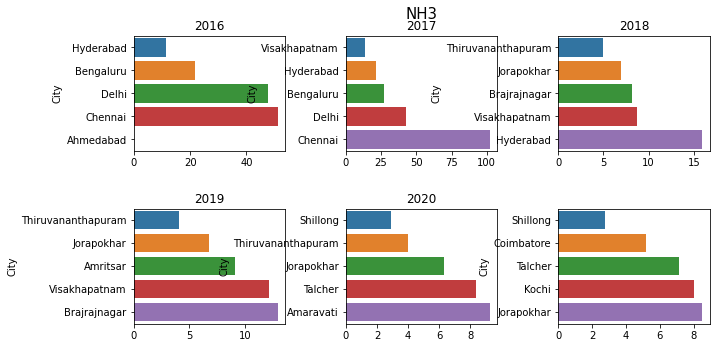

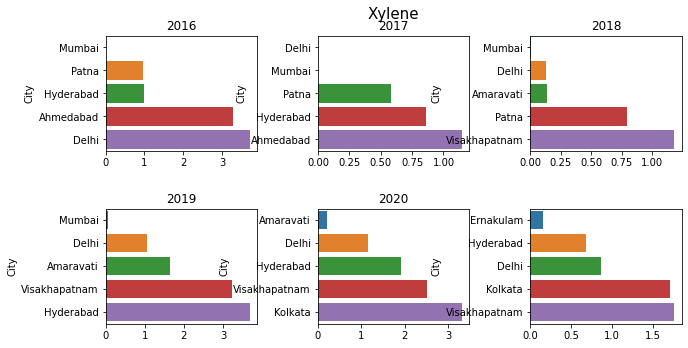

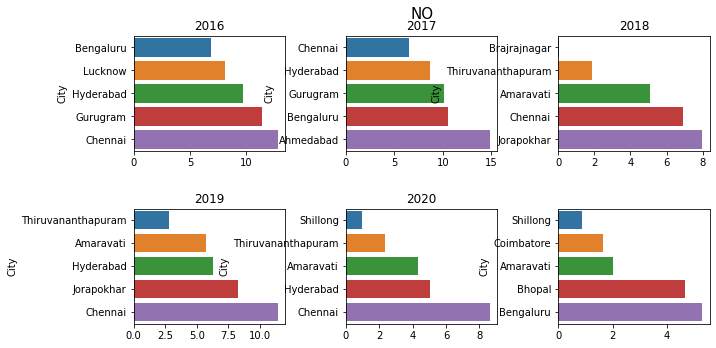

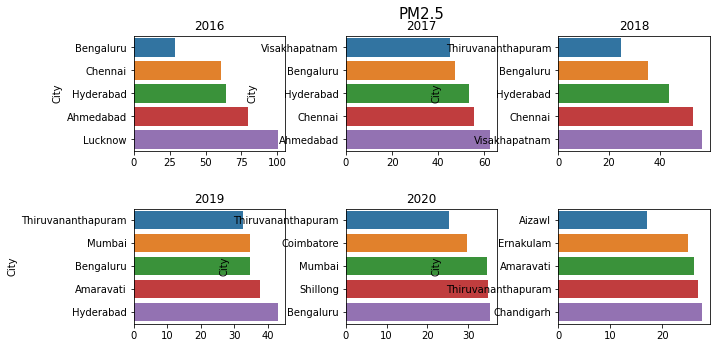

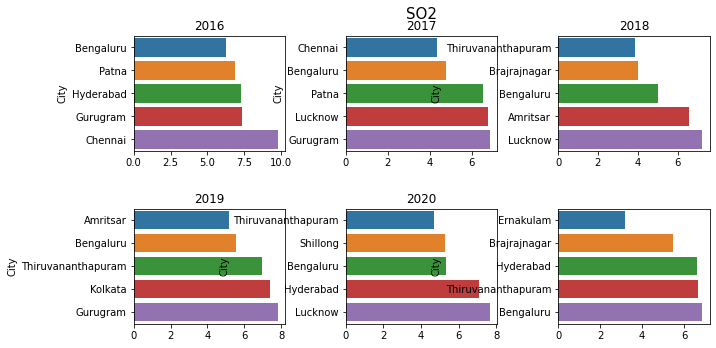

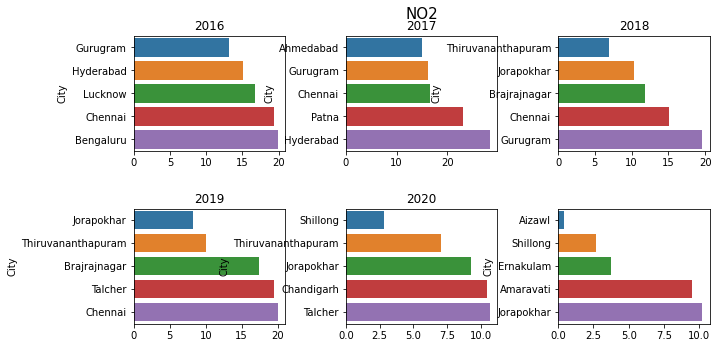

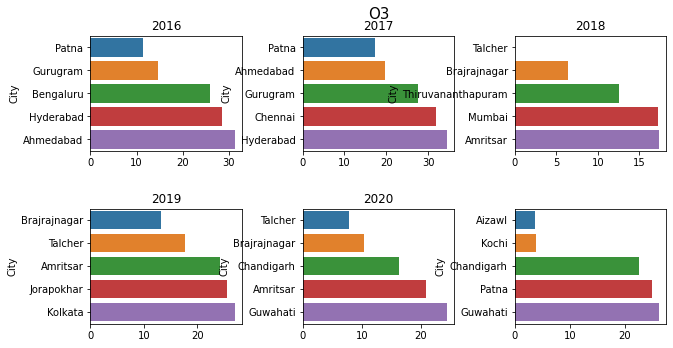

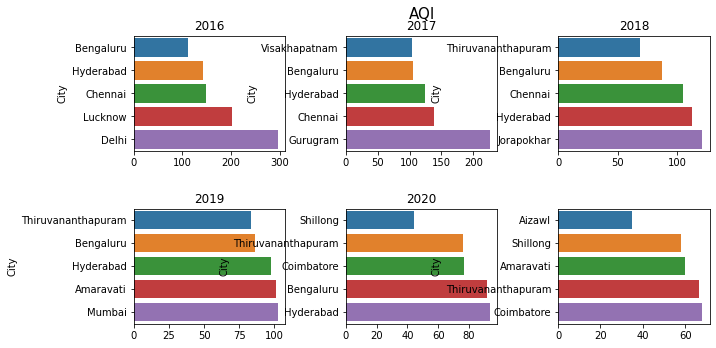

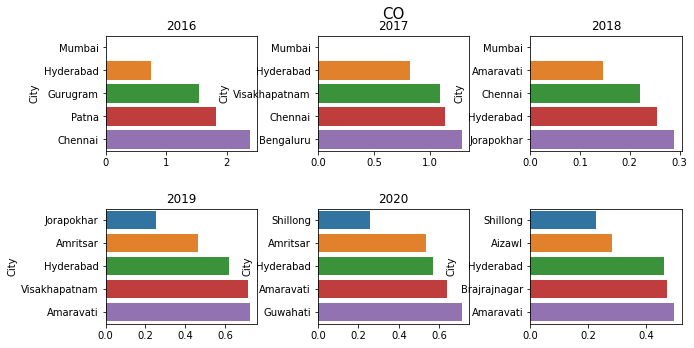

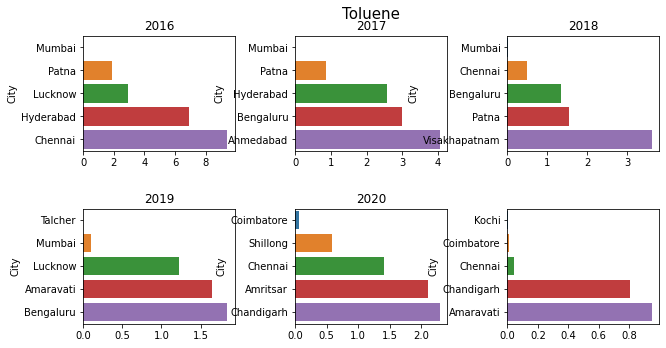

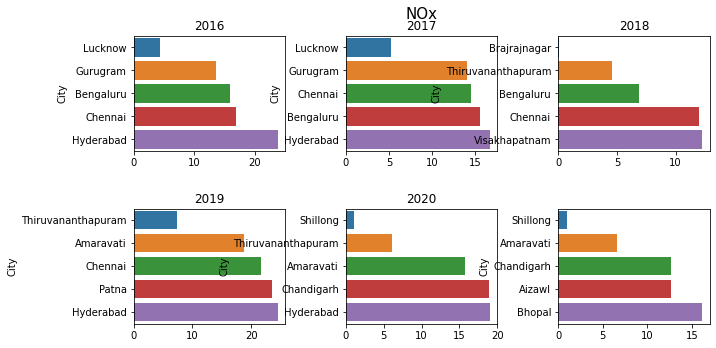

In [20]:
# Top 5 highest pm2.5  mean level cities over the years
import matplotlib.pyplot as plt

for j in columns :
    plt.figure(figsize = (10, 5))
    plt.suptitle(j, fontsize=15)
    for x,i in enumerate(data.Date.dt.year.unique()):
        plt.title(str(i))
        #sort(data[data[data.Date.dt.year]==i]['PM2.5'])
        df=data[data.Date.dt.year==i].groupby(['City'])[j].mean().sort_values(ascending=True).head(5) 
        plt.subplot(2, 3, 1+x)
        plt.subplots_adjust(left=0.1,
                        bottom=0.1,
                        right=0.9,
                        top=0.9,
                        wspace=0.4,
                        hspace=0.5)
        sns.barplot( x=df.values, y=df.index)
    

#### Thiruvananthapuram, bangalore, hyderabad are consistent top 5 min  mean aqi  list

In [22]:
data[data['City']=='Ahmedabad']['AQI'].isna().mean()

0.3359880537580886

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AQI', ylabel='Density'>

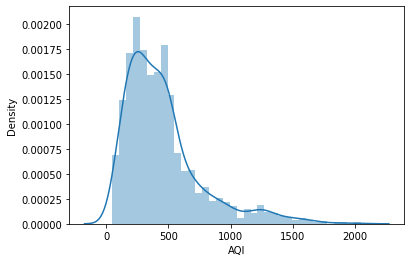

In [23]:
sns.distplot(data[data['City']=='Ahmedabad']['AQI'])

<AxesSubplot:>

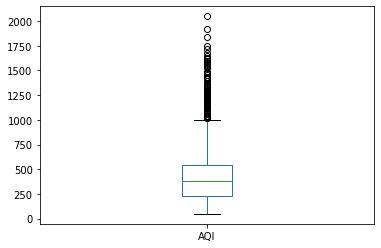

In [24]:
data[data['City']=='Ahmedabad'].boxplot( column =['AQI'], grid = False)

In [25]:
data[data['City']=='Ahmedabad']['AQI'].describe()

count    1334.000000
mean      452.122939
std       311.729553
min        48.000000
25%       231.000000
50%       384.500000
75%       542.750000
max      2049.000000
Name: AQI, dtype: float64

#### 33.3 % are nulls in ahmedabad AQI values 
#### there are huge number of outliers in the data-
#### AQI -2049 which is highest value in Ahmedabad Data  , Which has never happened in India
#### It has 25 % of AQI values over 500 which is not at all true  when checked it in offfcial websites
#### This indeed showed its effect on TOP mean AQI  cities list  

In [27]:

data[data.Date.dt.year==2015]['AQI'].describe()
#Data about AQI is completely in 2015


count    1827.000000
mean      212.463054
std       133.119404
min        31.000000
25%       114.000000
50%       175.000000
75%       294.000000
max      1247.000000
Name: AQI, dtype: float64

In [28]:
data['AQI'].groupby(data.Date.dt.year).count()

Date
2015    1827
2016    2573
2017    3234
2018    5724
2019    7071
2020    4421
Name: AQI, dtype: int64

In [29]:
(data.groupby([data.Date.dt.year,'City'])['AQI'].count()>300).groupby(level=0).count()
# no of cities in a year  with non Nan AQI value  days  >300 

Date
2015     9
2016    10
2017    17
2018    18
2019    23
2020    26
Name: AQI, dtype: int64

In [30]:
data[data.Date.dt.year==2019].groupby(['City'])['AQI'].mean().sort_values(ascending=True)
# mean aqi in the year 2019 in ascending order

City
Shillong               44.476190
Thiruvananthapuram     76.236467
Coimbatore             77.026596
Bengaluru              91.602740
Hyderabad              93.980822
Amaravati              98.485437
Chennai               102.942466
Mumbai                107.950685
Amritsar              109.500000
Jaipur                120.512329
Visakhapatnam         123.442815
Guwahati              127.560897
Chandigarh            135.547009
Kolkata               143.909589
Brajrajnagar          148.400621
Jorapokhar            157.587459
Bhopal                162.609524
Talcher               169.023102
Gurugram              195.222527
Lucknow               202.561644
Patna                 218.259053
Delhi                 232.104110
Ahmedabad             516.352273
Name: AQI, dtype: float64

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='AQI', ylabel='Density'>

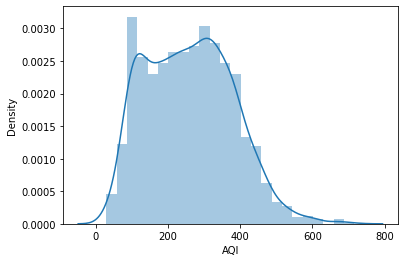

In [31]:
sns.distplot(data[data['City']=='Delhi']['AQI'])

#### *Calculating years with high pollution growth rate over the years*

In [32]:
# calculating years with high pollution growth rate over the years
pd.options.display.max_rows = 100
#(data.groupby(['City',data.Date.dt.year])['AQI'].mean().pct_change())
(data.groupby(['City',data.Date.dt.year])['AQI'].mean()).groupby(level=0).pct_change().groupby(level=0).mean().sort_values(ascending=True)

City
Chandigarh           -0.473278
Amaravati            -0.297994
Bhopal               -0.294313
Brajrajnagar         -0.164219
Amritsar             -0.143305
Kolkata              -0.129188
Jaipur               -0.121197
Patna                -0.118666
Coimbatore           -0.114608
Hyderabad            -0.113189
Chennai              -0.109377
Delhi                -0.089743
Talcher              -0.069656
Gurugram             -0.068835
Bengaluru            -0.062941
Lucknow              -0.038921
Visakhapatnam        -0.018590
Thiruvananthapuram    0.000564
Mumbai                0.005714
Ahmedabad             0.042247
Jorapokhar            0.100490
Guwahati              0.266126
Shillong              0.302485
Aizawl                     NaN
Ernakulam                  NaN
Kochi                      NaN
Name: AQI, dtype: float64

#### If we observe AQI of most cities has seen  signifacant decline due to covid-19
#### So removing 2020 

In [33]:
pd.options.display.max_rows = 10
data.groupby(['City',data.Date.dt.year])['AQI'].mean()


City           Date
Ahmedabad      2015    310.950570
               2016    310.162393
               2017    558.768116
               2018    622.263305
               2019    516.352273
                          ...    
Visakhapatnam  2016    103.976048
               2017    143.094340
               2018    122.819018
               2019    123.442815
               2020     84.685393
Name: AQI, Length: 103, dtype: float64

#### calculating years with high pollution growth rate over the years (without 2020 )

In [34]:
(data[data.Date.dt.year!=2020].groupby(['City',data.Date.dt.year])['AQI'].mean()).pct_change().groupby(level=0).mean()
pd.options.display.max_rows = 100
(data[data.Date.dt.year!=2020].groupby(['City',data.Date.dt.year])['AQI'].mean()).groupby(level=0).pct_change().groupby(level=0).mean().sort_values(ascending=True)

City
Amaravati            -0.250994
Brajrajnagar         -0.208279
Amritsar             -0.139509
Jaipur               -0.117934
Hyderabad            -0.099440
Talcher              -0.090025
Patna                -0.084180
Chennai              -0.081615
Kolkata              -0.073437
Delhi                -0.057858
Bengaluru            -0.046234
Gurugram             -0.029343
Lucknow               0.007425
Mumbai                0.052024
Thiruvananthapuram    0.064937
Visakhapatnam         0.079870
Ahmedabad             0.185608
Jorapokhar            0.189596
Bhopal                     NaN
Chandigarh                 NaN
Coimbatore                 NaN
Guwahati                   NaN
Shillong                   NaN
Name: AQI, dtype: float64

#### Cities with mean highest AQI month over the years

In [35]:

data.groupby(['City',data.Date.dt.month])['AQI'].mean().groupby(level=0).idxmax()

City
Ahmedabad                     (Ahmedabad, 11)
Aizawl                            (Aizawl, 3)
Amaravati                     (Amaravati, 12)
Amritsar                       (Amritsar, 11)
Bengaluru                      (Bengaluru, 1)
Bhopal                           (Bhopal, 11)
Brajrajnagar                (Brajrajnagar, 1)
Chandigarh                   (Chandigarh, 11)
Chennai                          (Chennai, 1)
Coimbatore                   (Coimbatore, 10)
Delhi                             (Delhi, 11)
Ernakulam                      (Ernakulam, 1)
Gurugram                       (Gurugram, 11)
Guwahati                        (Guwahati, 1)
Hyderabad                      (Hyderabad, 1)
Jaipur                           (Jaipur, 11)
Jorapokhar                   (Jorapokhar, 11)
Kochi                              (Kochi, 1)
Kolkata                          (Kolkata, 1)
Lucknow                         (Lucknow, 11)
Mumbai                           (Mumbai, 12)
Patna                        

#### Most of them are in winter season

#### list of cities having highest AQI levels in a particula month

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='count'>

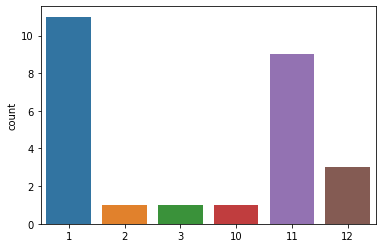

In [36]:
# list of cities having highest AQI levels in a particula month
y=data.groupby(['City',data.Date.dt.month])['AQI'].mean().groupby(level=0).idxmax()
count_month=[i[1] for i in y]
sns.countplot(count_month)


#### As Can be seen most cities have highest AQI levels in January, Novemeber , December which is winter season in Indian subcontinent

In [37]:
data_pre=data.copy()
data_pre['AQI_Bucket'].map({'Poor':2, 'Very Poor':1, 'Severe':0, 'Moderate':3, 'Satisfactory':4,
       'Good':5})

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
29526    5.0
29527    4.0
29528    4.0
29529    4.0
29530    5.0
Name: AQI_Bucket, Length: 29531, dtype: float64

In [38]:
data_pre['AQI_Rank']=data_pre['AQI_Bucket'].map({'Poor':2, 'Very Poor':1, 'Severe':0, 'Moderate':3, 'Satisfactory':4,
       'Good':5})
data_pre

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,AQI_Rank
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good,5.0
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory,4.0
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory,4.0
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory,4.0


([<matplotlib.patches.Wedge at 0x7f2a89293a90>,
 [Text(1.099996949643506, 0.0025905163543849417, 'Good'),
  Text(0.9802247555406907, 0.49915872087462654, 'Moderate'),
  Text(0.08023474517842194, 1.0970699091972917, 'Poor'),
  Text(-0.6108580113768922, 0.9147964199408898, 'Satisfactory'),
  Text(-0.8941627614762476, -0.6406816338784587, 'Severe'),
  Text(0.9607250241956743, -0.5357307419629951, 'Very Poor')])

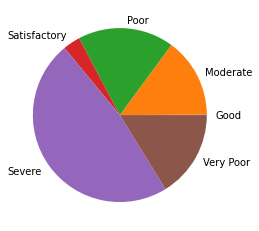

In [39]:
pd.options.display.max_rows = 1000

x=data_pre[data_pre['City']=='Ahmedabad'].groupby(['City','AQI_Bucket'])['AQI_Bucket'].count()
plt.pie(x/data_pre.groupby(['City'])['AQI_Bucket'].count(),labels=[i[1] for i in x.index])




<AxesSubplot:xlabel='City'>

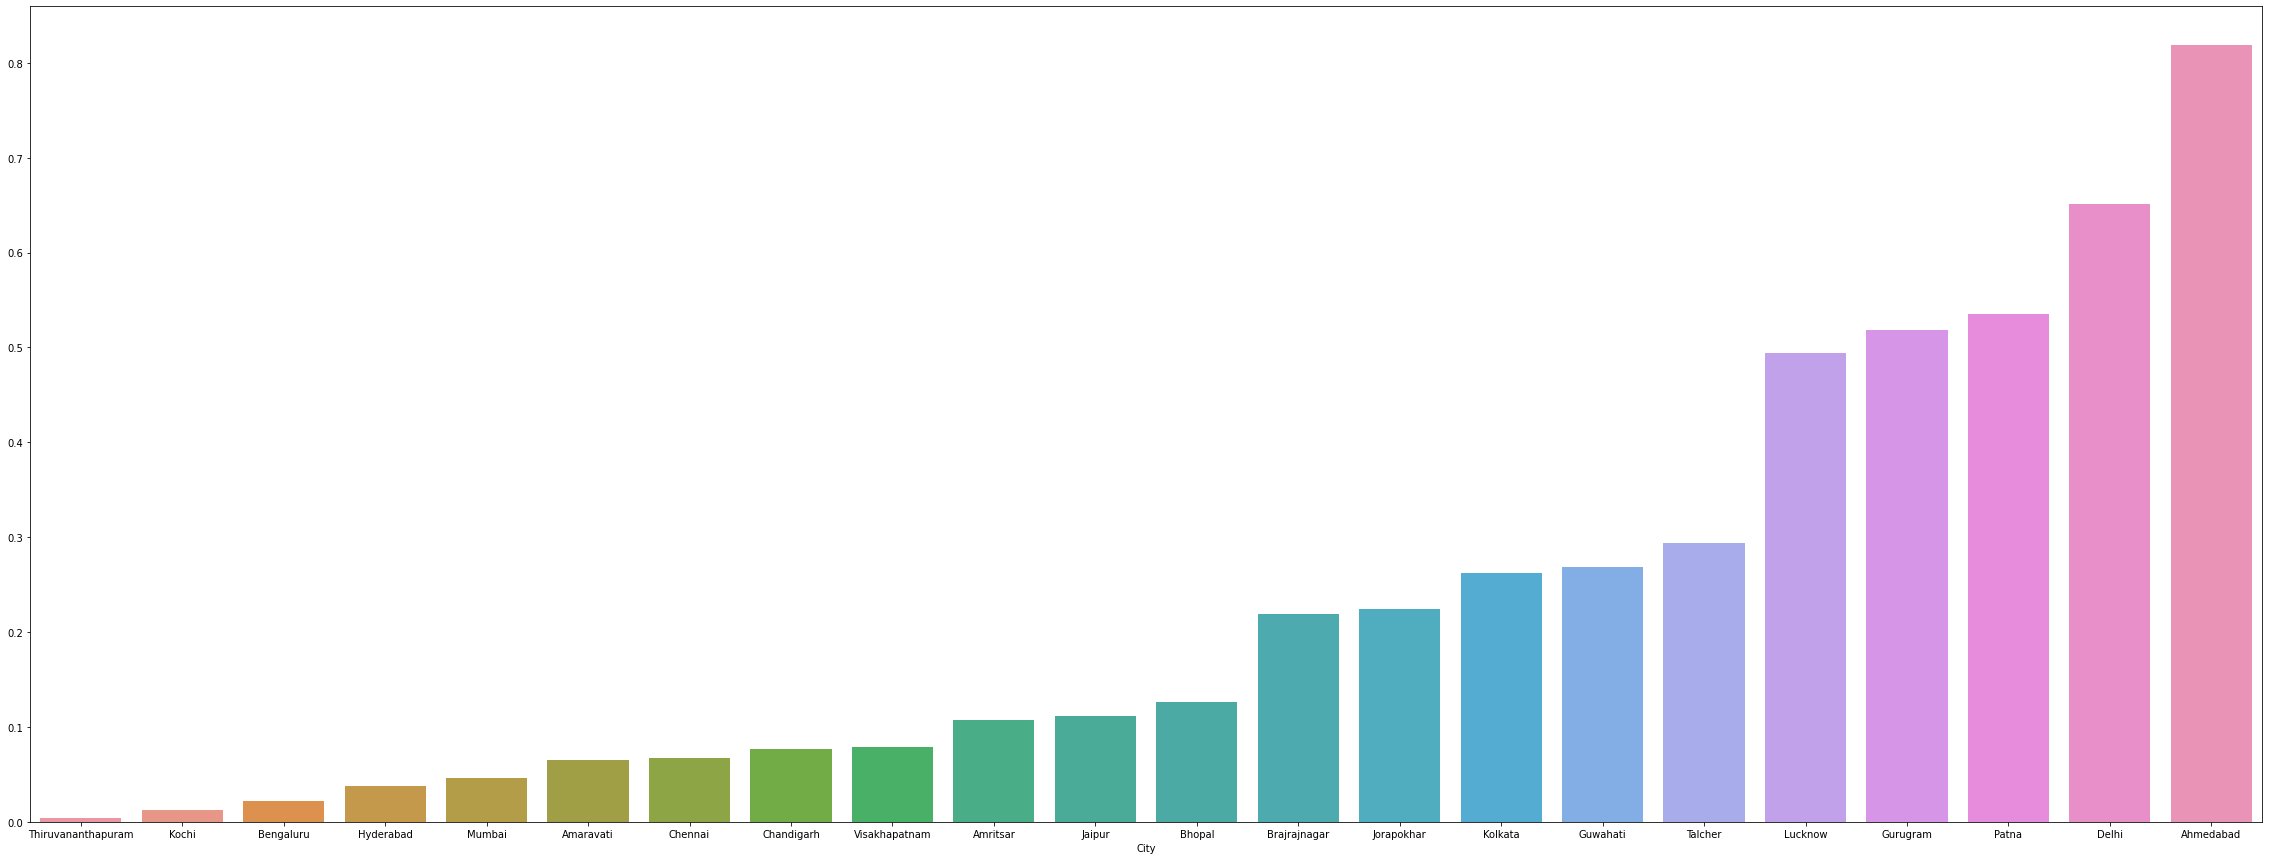

In [40]:
# percentage of total days in a city where it has AQI level equal to or above moderate level
y=data_pre[data_pre['AQI_Rank']<=2].groupby(['City'])['AQI_Rank'].count()/data_pre.groupby(['City'])['AQI_Bucket'].count()
y.dropna(inplace=True)
fig, ax = plt.subplots(figsize=(40, 15))
sns.barplot(x=y.sort_values().index,y=y.sort_values().values)


#### Ahmedabad , Delhi, Patna , Lucknow, Gurugram have AQI level  poor or worse almost half of the time

In [41]:
dataset=data_pre[(data_pre['City']=='Delhi') & (data_pre.Date.dt.year<2019  )]['AQI'].dropna()

In [42]:
dataset=np.array(dataset)

In [43]:
 import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from tensorflow.keras.layers import Dropout

In [44]:
# fix random seed for reproducibility
tf.random.set_seed(7)
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset=dataset.reshape(-1,1)
dataset = scaler.fit_transform(dataset)

In [45]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
print(len(train), len(test))


972 479


In [46]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [47]:
look_back = 30
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [48]:

# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [49]:

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.add(Dropout(0.2))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

2022-12-28 13:34:31.329042: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2022-12-28 13:34:32.016778: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100
941/941 - 4s - loss: 0.0424
Epoch 2/100
941/941 - 2s - loss: 0.0410
Epoch 3/100
941/941 - 2s - loss: 0.0390
Epoch 4/100
941/941 - 2s - loss: 0.0408
Epoch 5/100
941/941 - 2s - loss: 0.0386
Epoch 6/100
941/941 - 2s - loss: 0.0390
Epoch 7/100
941/941 - 2s - loss: 0.0356
Epoch 8/100
941/941 - 2s - loss: 0.0406
Epoch 9/100
941/941 - 2s - loss: 0.0411
Epoch 10/100
941/941 - 2s - loss: 0.0408
Epoch 11/100
941/941 - 2s - loss: 0.0373
Epoch 12/100
941/941 - 2s - loss: 0.0348
Epoch 13/100
941/941 - 2s - loss: 0.0399
Epoch 14/100
941/941 - 2s - loss: 0.0430
Epoch 15/100
941/941 - 2s - loss: 0.0381
Epoch 16/100
941/941 - 2s - loss: 0.0377
Epoch 17/100
941/941 - 2s - loss: 0.0343
Epoch 18/100
941/941 - 2s - loss: 0.0359
Epoch 19/100
941/941 - 2s - loss: 0.0351
Epoch 20/100
941/941 - 2s - loss: 0.0371
Epoch 21/100
941/941 - 2s - loss: 0.0388
Epoch 22/100
941/941 - 2s - loss: 0.0413
Epoch 23/100
941/941 - 2s - loss: 0.0400
Epoch 24/100
941/941 - 2s - loss: 0.0429
Epoch 25/100
941/941 - 2s

In [50]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 77.82 RMSE
Test Score: 76.05 RMSE


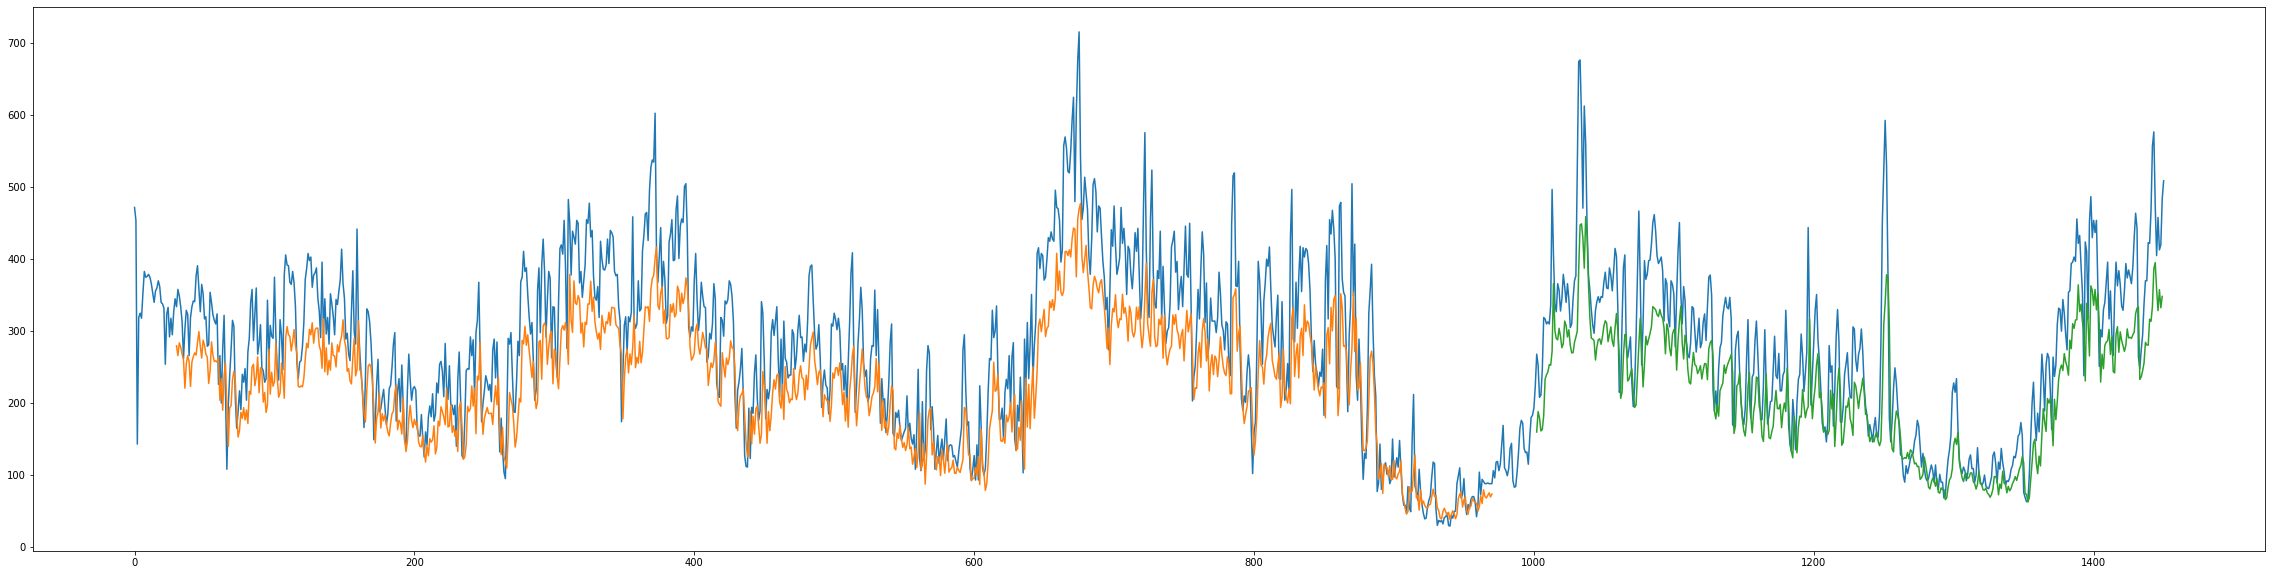

In [51]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
fig, ax = plt.subplots(figsize=(40, 10))
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [52]:
# predicting 2020 AQI 
data20=data_pre[(data_pre['City']=='Delhi') & (data_pre.Date.dt.year==2020  )]['AQI'].dropna()
dataset=np.array(data20)
dataset=dataset.reshape(-1,1)
dataset = scaler.fit_transform(dataset)

In [53]:
testX, testY = create_dataset(dataset, look_back)
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
# make predictions
testPredict = model.predict(testX)
# invert predictions
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 41.73 RMSE


In [54]:
dataset.shape

(183, 1)

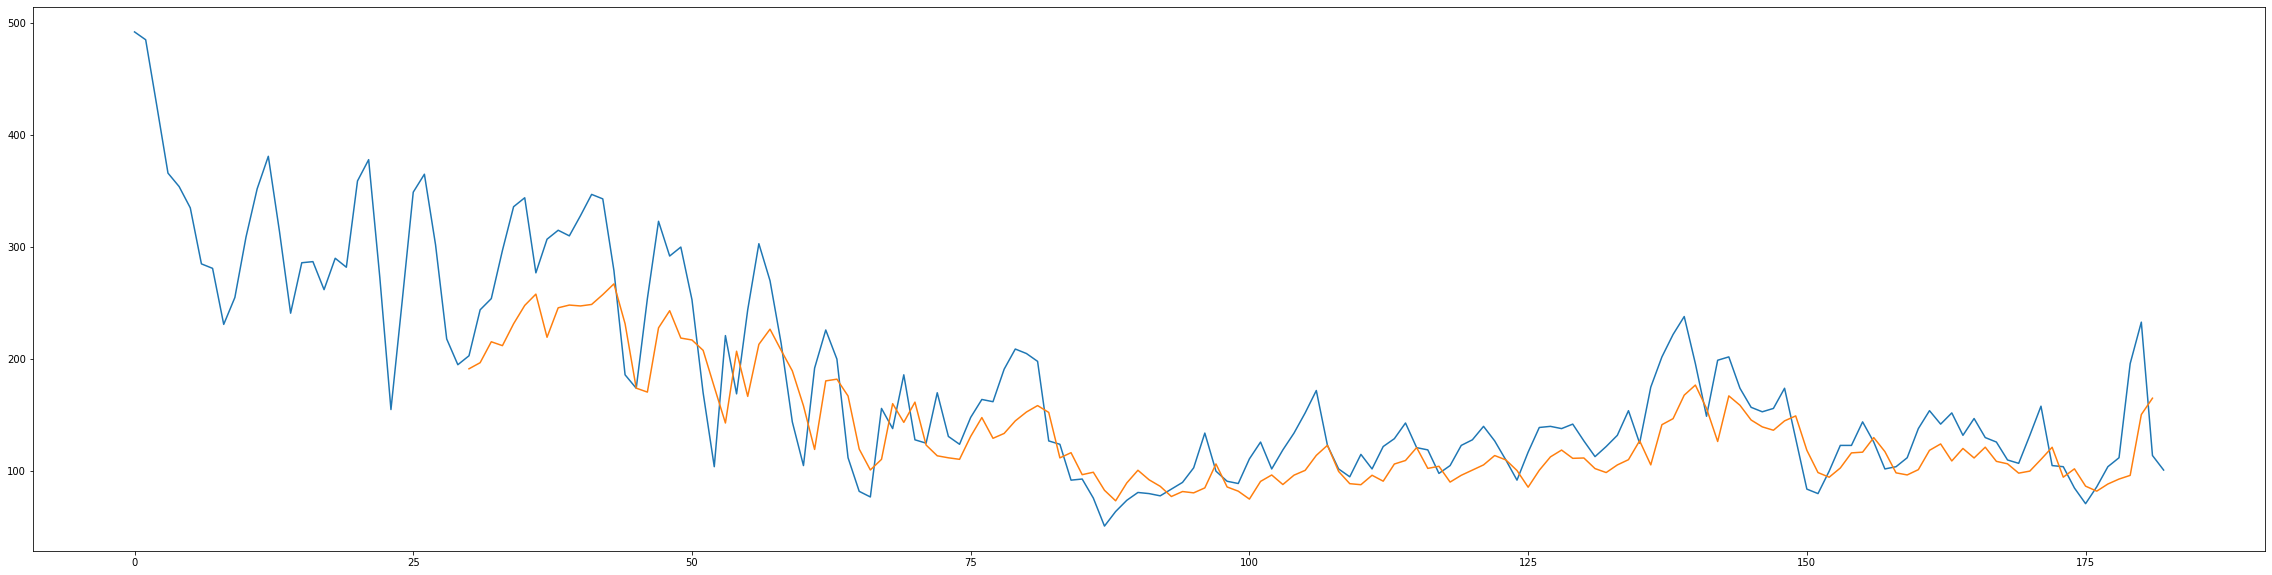

In [55]:
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[29+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
fig, ax = plt.subplots(figsize=(40, 10))
plt.plot(scaler.inverse_transform(dataset))
plt.plot(testPredictPlot)
plt.show()

In [56]:
# predicting 2020 AQI 
data20=data_pre[(data_pre['City']=='Delhi') & (data_pre.Date.dt.year==2020  ) &(data_pre.Date.dt.month==6)]['AQI'].dropna()
dataset=np.array(data20)
dataset

array([100., 123., 123., 144., 126., 102., 104., 112., 138., 154., 142.,
       152., 132., 147., 130., 126., 110., 107., 132., 158., 105., 104.,
        85.,  71.,  86., 104., 112., 196., 233., 114.])

In [57]:
def predict(num_prediction, model):
    prediction_list = dataset[-look_back:]
    
    for _ in range(num_prediction):
        x = np.array(prediction_list[-look_back:])
        x = np.reshape(x,(1, 1, 30))
        out = model.predict(x)
       # print(scaler.inverse_transform(out))
        prediction_list = np.append(prediction_list, out)
    prediction_list = prediction_list[look_back-1:]
        
    return prediction_list

num_prediction = 365
forecast = predict(num_prediction, model)

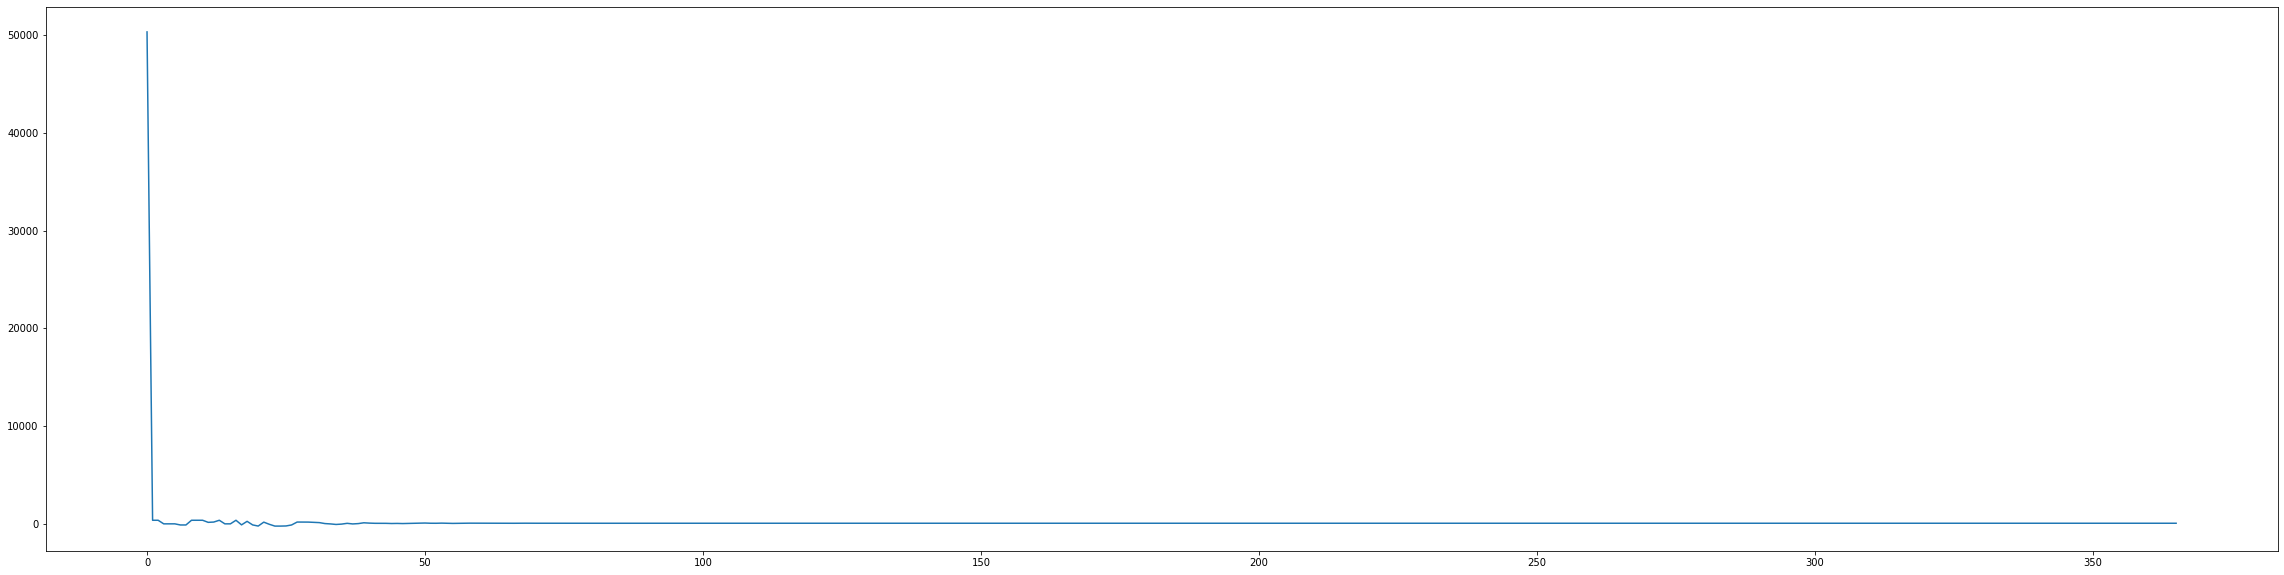

In [58]:

fig, ax = plt.subplots(figsize=(40, 10))
plt.plot(scaler.inverse_transform(forecast.reshape(-1,1)))


#  Clustering with Time series

In [ ]:
## clustering with Time series
time_series=pd.Series()

for i in data_pre['City'].unique():
    time_series.loc[i]=data_pre[data_pre['City']==i]['AQI']
    



In [60]:
k={}
for i in data_pre['City'].unique():
        k[i]=len(time_series.loc[i])
        


In [61]:
k=data_pre[data_pre['City']=='Visakhapatnam']['Date'].sort_values().head(1).reset_index(drop = True)[0].date()
print(k)

2016-07-01


In [62]:
cities=[]
for i in data_pre['City'].unique():
    k=data_pre[data_pre['City']==i]['Date'].sort_values().head(1).reset_index(drop = True)[0].date()
    y=data_pre[data_pre['City']==i]['Date'].sort_values().tail(1).reset_index(drop = True)[0].date()
    if (y-k).days>1000:
        cities.append(i)
        print(i+' '+str(k)+' ' +str(y)+ ' '+str((y-k).days))

Ahmedabad 2015-01-01 2020-07-01 2008
Amritsar 2017-02-27 2020-07-01 1220
Bengaluru 2015-01-01 2020-07-01 2008
Chennai 2015-01-01 2020-07-01 2008
Delhi 2015-01-01 2020-07-01 2008
Gurugram 2015-11-27 2020-07-01 1678
Hyderabad 2015-01-04 2020-07-01 2005
Jaipur 2017-06-14 2020-07-01 1113
Jorapokhar 2017-04-20 2020-07-01 1168
Lucknow 2015-01-01 2020-07-01 2008
Mumbai 2015-01-01 2020-07-01 2008
Patna 2015-06-01 2020-07-01 1857
Thiruvananthapuram 2017-06-16 2020-07-01 1111
Visakhapatnam 2016-07-01 2020-07-01 1461


In [119]:
time_series=[]
for i in cities:
    data=data_pre[data_pre['City']==i][['Date','AQI']]
    city=pd.DataFrame(data, columns = ['Date', 'AQI'])
    city.set_index("Date",inplace=True)
    # set the date columns as index
    city.sort_index(inplace=True)
    all_times=pd.date_range(start='1/1/2015', end='7/1/2020')
    time_series.append(city.reindex(all_times))


[              AQI
 2015-01-01    NaN
 2015-01-02    NaN
 2015-01-03    NaN
 2015-01-04    NaN
 2015-01-05    NaN
 ...           ...
 2020-06-27   92.0
 2020-06-28   82.0
 2020-06-29   74.0
 2020-06-30   98.0
 2020-07-01  119.0
 
 [2009 rows x 1 columns],
              AQI
 2015-01-01   NaN
 2015-01-02   NaN
 2015-01-03   NaN
 2015-01-04   NaN
 2015-01-05   NaN
 ...          ...
 2020-06-27  74.0
 2020-06-28  85.0
 2020-06-29  49.0
 2020-06-30  66.0
 2020-07-01  78.0
 
 [2009 rows x 1 columns],
              AQI
 2015-01-01   NaN
 2015-01-02   NaN
 2015-01-03   NaN
 2015-01-04   NaN
 2015-01-05   NaN
 ...          ...
 2020-06-27  51.0
 2020-06-28  61.0
 2020-06-29  65.0
 2020-06-30  63.0
 2020-07-01  43.0
 
 [2009 rows x 1 columns],
               AQI
 2015-01-01    NaN
 2015-01-02    NaN
 2015-01-03    NaN
 2015-01-04    NaN
 2015-01-05    NaN
 ...           ...
 2020-06-27   95.0
 2020-06-28   98.0
 2020-06-29  104.0
 2020-06-30  110.0
 2020-07-01   92.0
 
 [2009 rows x 1 columns],


#### Data Preprocessing

#### removing all cities which have nulls over 30 % in data

In [120]:
final_cit=[]
remov=[]
for i,j in enumerate(time_series):
    if j['AQI'].isnull().mean()<0.3:
        print(cities[i],j['AQI'].isnull().mean())
        final_cit.append(cities[i])
    else:
        remov.append(i)
          
tim_series=[i for i in time_series if i['AQI'].isnull().mean()<0.3 ]  
len(tim_series)

Bengaluru 0.04927824788451966
Chennai 0.06222000995520159
Delhi 0.004977600796416127
Gurugram 0.27675460428073667
Hyderabad 0.06421105027376804
Lucknow 0.05774016923842708
Patna 0.273768043802887


7

In [121]:
for cit in cities:
    print(cit,data_pre[data_pre['City']==cit]['AQI'].isnull().mean())
final_cit    

Ahmedabad 0.3359880537580886
Amritsar 0.07780507780507781
Bengaluru 0.04927824788451966
Chennai 0.06222000995520159
Delhi 0.004977600796416127
Gurugram 0.1346039309112567
Hyderabad 0.06281156530408774
Jaipur 0.017953321364452424
Jorapokhar 0.34046193327630453
Lucknow 0.05774016923842708
Mumbai 0.6142359382777501
Patna 0.2147470398277718
Thiruvananthapuram 0.0539568345323741
Visakhapatnam 0.19904240766073872


['Bengaluru', 'Chennai', 'Delhi', 'Gurugram', 'Hyderabad', 'Lucknow', 'Patna']

In [122]:
# for i in range(len(final_cit)):
#     tim_series[i]['AQI'].interpolate(method='quadratic',limit_direction="both",inplace=True)

In [123]:
import math
# a=tim_series[1].reset_index()
# b=a.apply(lambda x: fill_null(x['index'],x['AQI'],1) if math.isnan(x['AQI']) else x['AQI'],axis=1)
# all_times=pd.date_range(start='1/1/2015', end='7/1/2020')
# b.index=all_times
# tim_series[1]['AQI']=b
# tim_series[1]


#### Made a function which replaces null values with a mean of all previous years over the same month and day
#### Ex - Replacing null value on 2015/1/1 with mean of (2016/1/1,2017/1/1, 2018/1/1 ......)

In [124]:
def fill_null(x,y,i):
    a=tim_series[i].reset_index()
    return a[(a['index'].dt.month==x.month) & (a['index'].dt.day==x.day)]['AQI'].mean()
     
for i in range(len(tim_series)):
    
    if tim_series[i]['AQI'].isnull().sum()>0:
        a=tim_series[i].reset_index()
        b=a.apply(lambda x: fill_null(x['index'],x['AQI'],i) if math.isnan(x['AQI']) else x['AQI'],axis=1)
        all_times=pd.date_range(start='1/1/2015', end='7/1/2020')
        b.index=all_times
        tim_series[i]['AQI']=b

#### Total null values

In [125]:
sum=0
for i in range(len(tim_series)):
    sum+=tim_series[i]['AQI'].isnull().sum()
print(sum)    

0


#### Time series plot of all cities

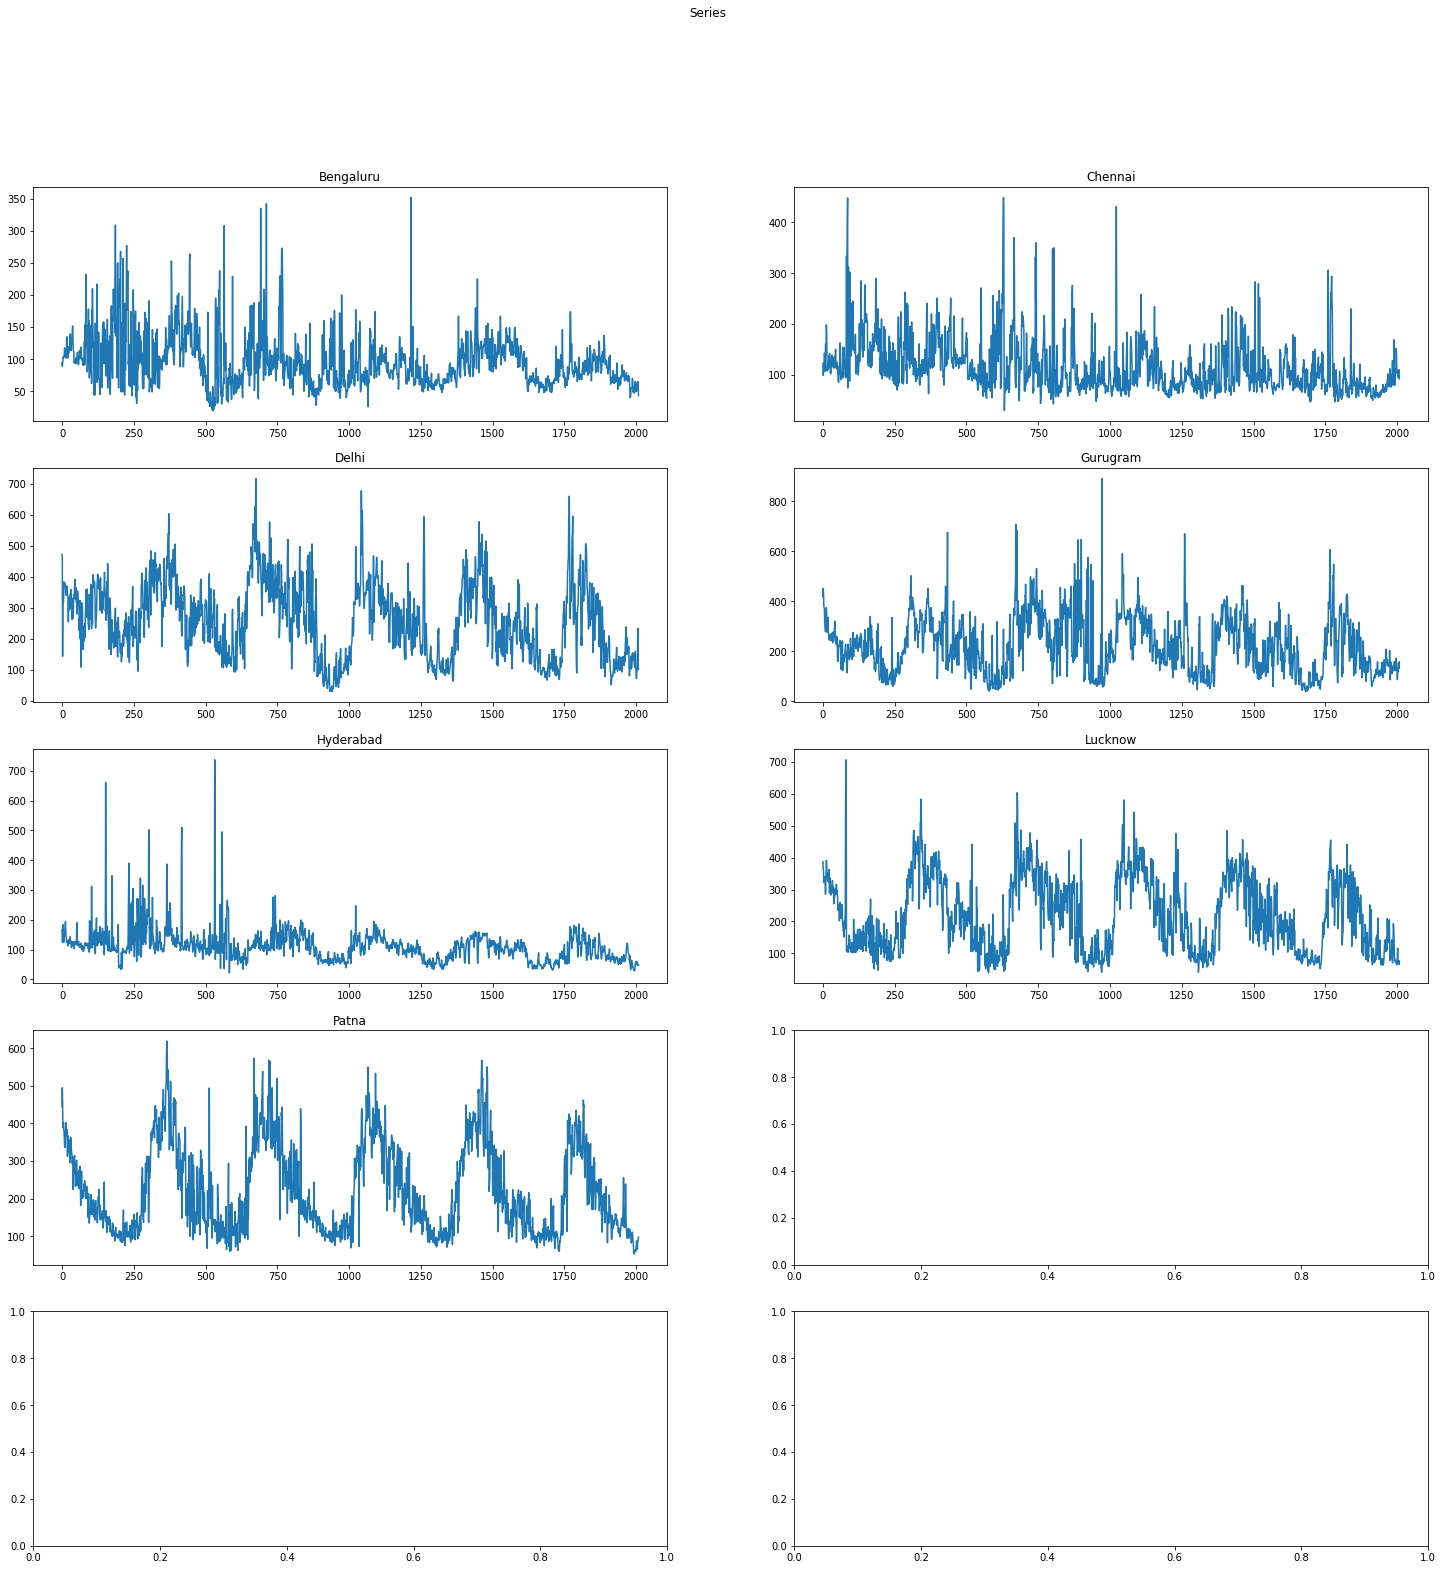

In [126]:
fig, axs = plt.subplots(5,2,figsize=(25,25))
fig.suptitle('Series')
for i in range(5):
    for j in range(2):
        if i*2+j+1>len(tim_series): # pass the others that we can't fill
            continue
        axs[i, j].plot(tim_series[i*2+j]['AQI'].values)
        axs[i, j].set_title(final_cit[i*2+j])
plt.show()

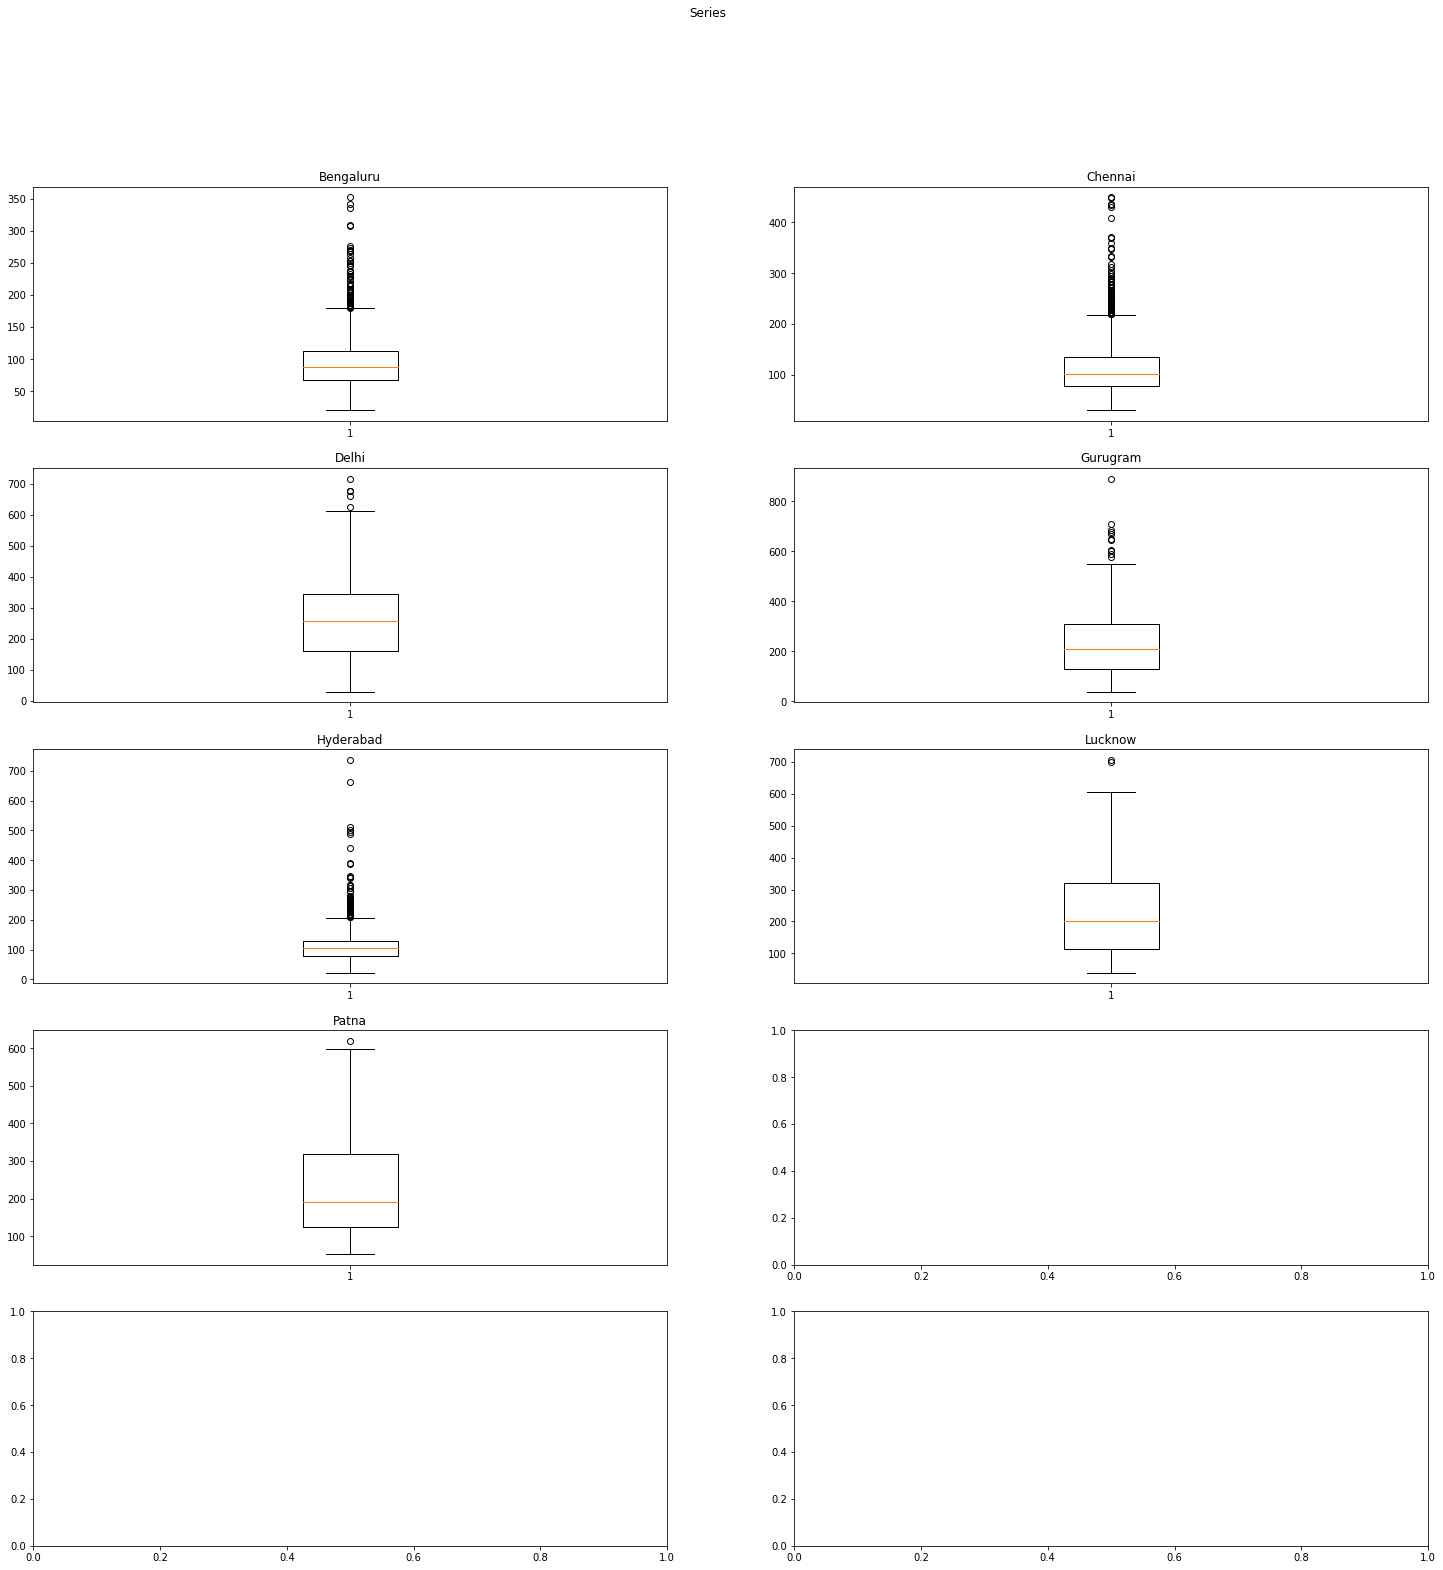

In [127]:
# outliers 
fig, axs = plt.subplots(5,2,figsize=(25,25))
fig.suptitle('Series')
for i in range(5):
    for j in range(2):
        if i*2+j+1>len(tim_series): # pass the others that we can't fill
            continue
        axs[i, j].boxplot(tim_series[i*2+j]['AQI'])
        axs[i, j].set_title(final_cit[i*2+j])
plt.show()

#### Replacing outliers with median

In [128]:
for i in range(len(tim_series)):
    Q1 = tim_series[i]['AQI'].quantile(0.25)
    Q3 = tim_series[i]['AQI'].quantile(0.75)
    IQR = Q3 - Q1
    print(final_cit[i],((tim_series[i]['AQI'] < (Q1 - 1.5 * IQR)) | (tim_series[i]['AQI'] > (Q3 + 1.5 * IQR))).sum())

Bengaluru 67
Chennai 78
Delhi 6
Gurugram 11
Hyderabad 66
Lucknow 2
Patna 1


In [129]:
for i in range(len(tim_series)):
    Q1 = tim_series[i]['AQI'].quantile(0.25)
    Q3 = tim_series[i]['AQI'].quantile(0.75)
    IQR = Q3 - Q1
    mask = (tim_series[i]['AQI'] < (Q1 - 1.5 * IQR)) | (tim_series[i]['AQI'] > (Q3 + 1.5 * IQR))
    tim_series[i]['AQI'][mask] = tim_series[i]['AQI'].median()

In [130]:
# tim_series[0]['AQI'][tim_series[0]['AQI']>500] = 500

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

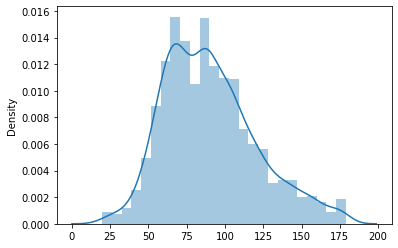

In [131]:
# Observing the distribution after preprocessing
sns.distplot(tim_series[0])

In [132]:
tim_series[0].describe()

,AQI
count,2009.000000
mean,90.362992
std,30.146531
min,20.000000
25%,67.000000
50%,88.000000
75%,107.400000
max,179.000000


In [133]:
 #sma_ahmedabad= df['AvgTemperature'].rolling(window=5).mean()

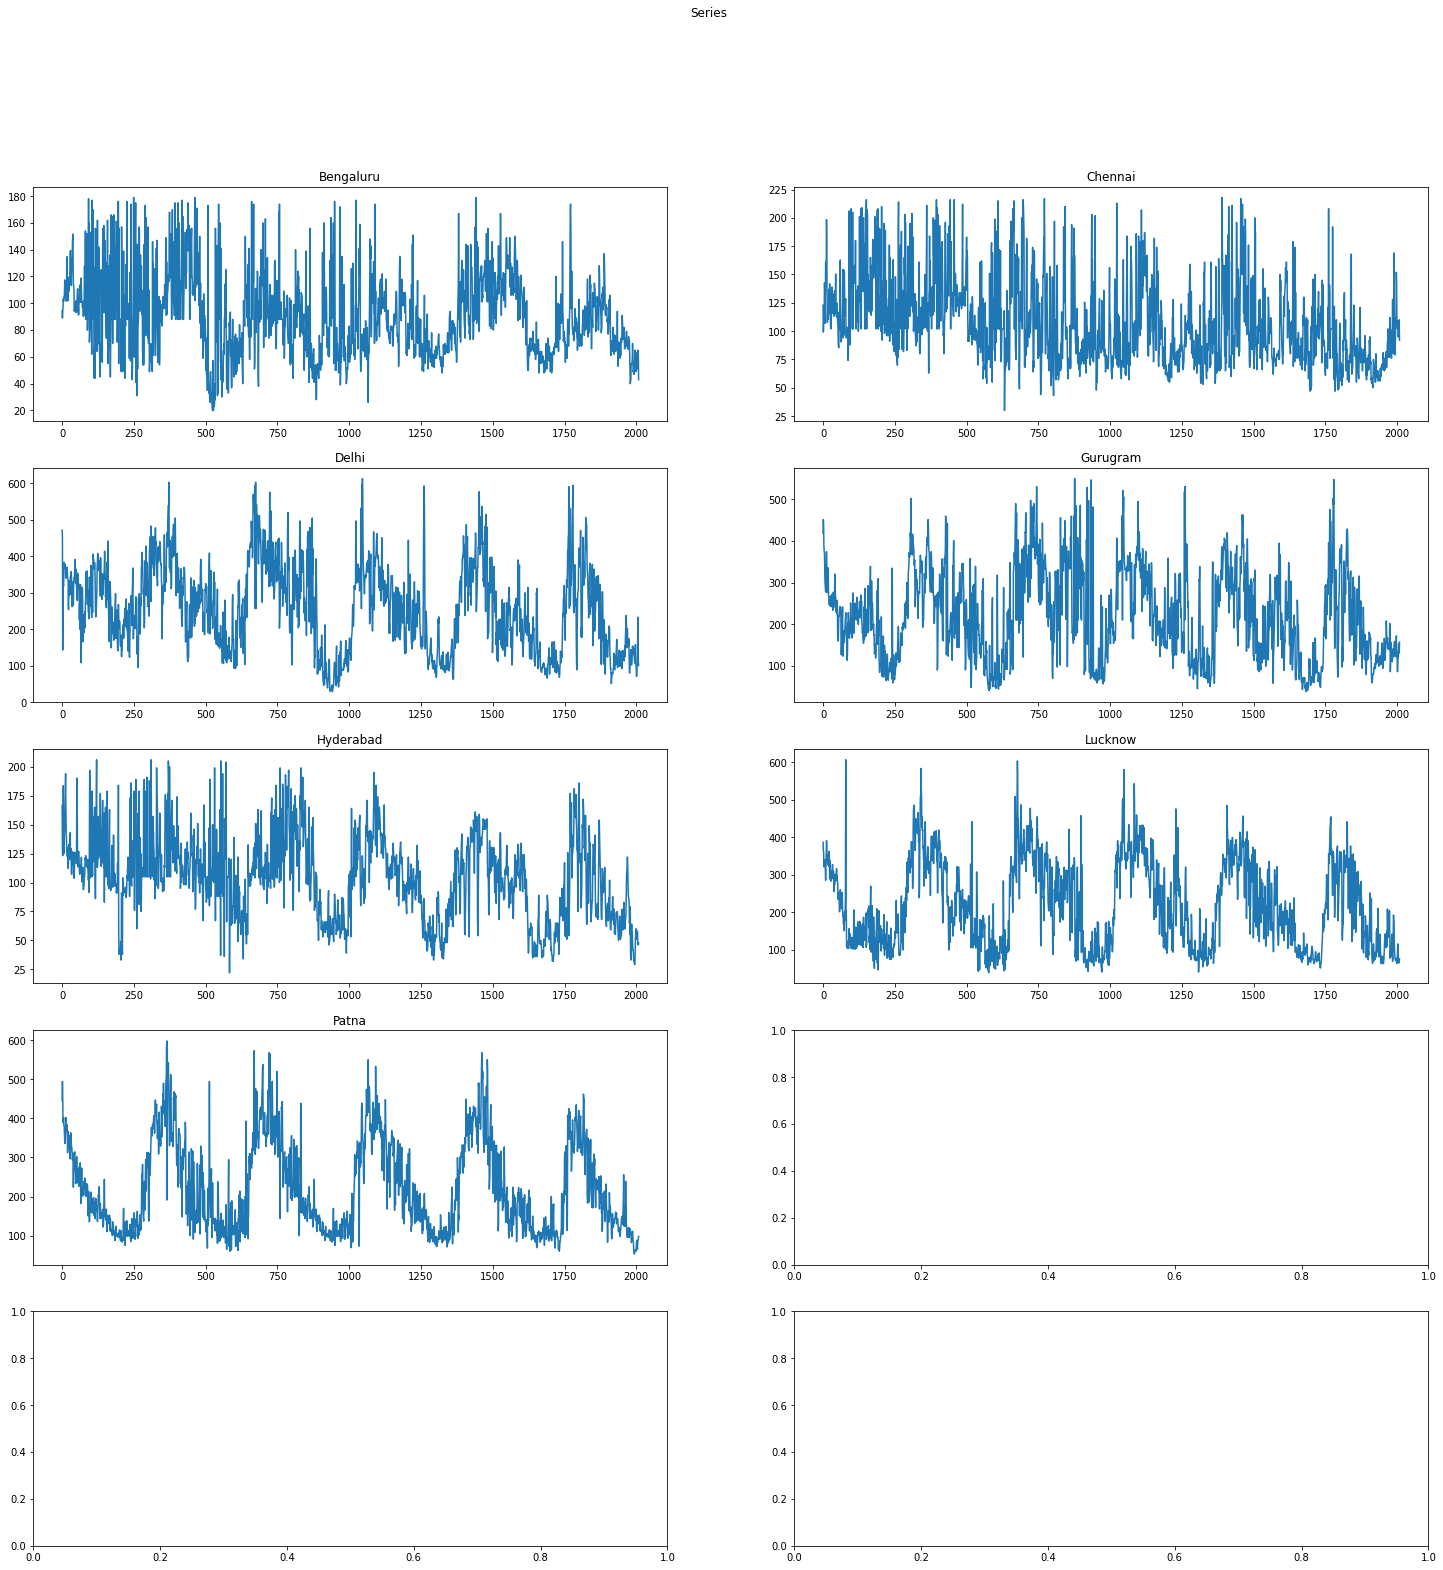

In [134]:
fig, axs = plt.subplots(5,2,figsize=(25,25))
fig.suptitle('Series')
for i in range(5):
    for j in range(2):
        if i*2+j+1>len(tim_series): # pass the others that we can't fill
            continue
        axs[i, j].plot(tim_series[i*2+j]['AQI'].values)
        axs[i, j].set_title(final_cit[i*2+j])
plt.show()

In [135]:
!pip install tslearn

In [136]:
tim_org=tim_series.copy()
tim_org

[              AQI
 2015-01-01   94.4
 2015-01-02   89.0
 2015-01-03   93.0
 2015-01-04   97.4
 2015-01-05  103.2
 ...           ...
 2020-06-27   51.0
 2020-06-28   61.0
 2020-06-29   65.0
 2020-06-30   63.0
 2020-07-01   43.0
 
 [2009 rows x 1 columns],
               AQI
 2015-01-01  122.8
 2015-01-02   99.2
 2015-01-03  105.2
 2015-01-04  114.2
 2015-01-05  118.0
 ...           ...
 2020-06-27   95.0
 2020-06-28   98.0
 2020-06-29  104.0
 2020-06-30  110.0
 2020-07-01   92.0
 
 [2009 rows x 1 columns],
               AQI
 2015-01-01  472.0
 2015-01-02  454.0
 2015-01-03  143.0
 2015-01-04  319.0
 2015-01-05  325.0
 ...           ...
 2020-06-27  112.0
 2020-06-28  196.0
 2020-06-29  233.0
 2020-06-30  114.0
 2020-07-01  101.0
 
 [2009 rows x 1 columns],
               AQI
 2015-01-01  418.5
 2015-01-02  451.5
 2015-01-03  435.5
 2015-01-04  384.0
 2015-01-05  374.5
 ...           ...
 2020-06-27  121.0
 2020-06-28  153.0
 2020-06-29  140.0
 2020-06-30  131.0
 2020-07-01  157.0
 
 [

#### Normalizing the data

In [137]:
mySeries=tim_series
for i in range(len(mySeries)):
    scaler = MinMaxScaler()
    mySeries[i] = MinMaxScaler().fit_transform(mySeries[i])
tim_series=mySeries

#### Applying k-mean clustering with dynamic time warping  as metric ( not euclidian )

In [138]:
import math
from tslearn.clustering import TimeSeriesKMeans
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA
cluster_count = math.ceil(math.sqrt(len(tim_series))) 
# A good rule of thumb is choosing k as the square root of the number of points in the training data set in kNN

km = TimeSeriesKMeans(n_clusters=cluster_count, metric="dtw",random_state=0)

labels = km.fit_predict(tim_series)

In [139]:
tim_series=tim_org


[              AQI
 2015-01-01   94.4
 2015-01-02   89.0
 2015-01-03   93.0
 2015-01-04   97.4
 2015-01-05  103.2
 ...           ...
 2020-06-27   51.0
 2020-06-28   61.0
 2020-06-29   65.0
 2020-06-30   63.0
 2020-07-01   43.0
 
 [2009 rows x 1 columns],
               AQI
 2015-01-01  122.8
 2015-01-02   99.2
 2015-01-03  105.2
 2015-01-04  114.2
 2015-01-05  118.0
 ...           ...
 2020-06-27   95.0
 2020-06-28   98.0
 2020-06-29  104.0
 2020-06-30  110.0
 2020-07-01   92.0
 
 [2009 rows x 1 columns],
               AQI
 2015-01-01  472.0
 2015-01-02  454.0
 2015-01-03  143.0
 2015-01-04  319.0
 2015-01-05  325.0
 ...           ...
 2020-06-27  112.0
 2020-06-28  196.0
 2020-06-29  233.0
 2020-06-30  114.0
 2020-07-01  101.0
 
 [2009 rows x 1 columns],
               AQI
 2015-01-01  418.5
 2015-01-02  451.5
 2015-01-03  435.5
 2015-01-04  384.0
 2015-01-05  374.5
 ...           ...
 2020-06-27  121.0
 2020-06-28  153.0
 2020-06-29  140.0
 2020-06-30  131.0
 2020-07-01  157.0
 
 [

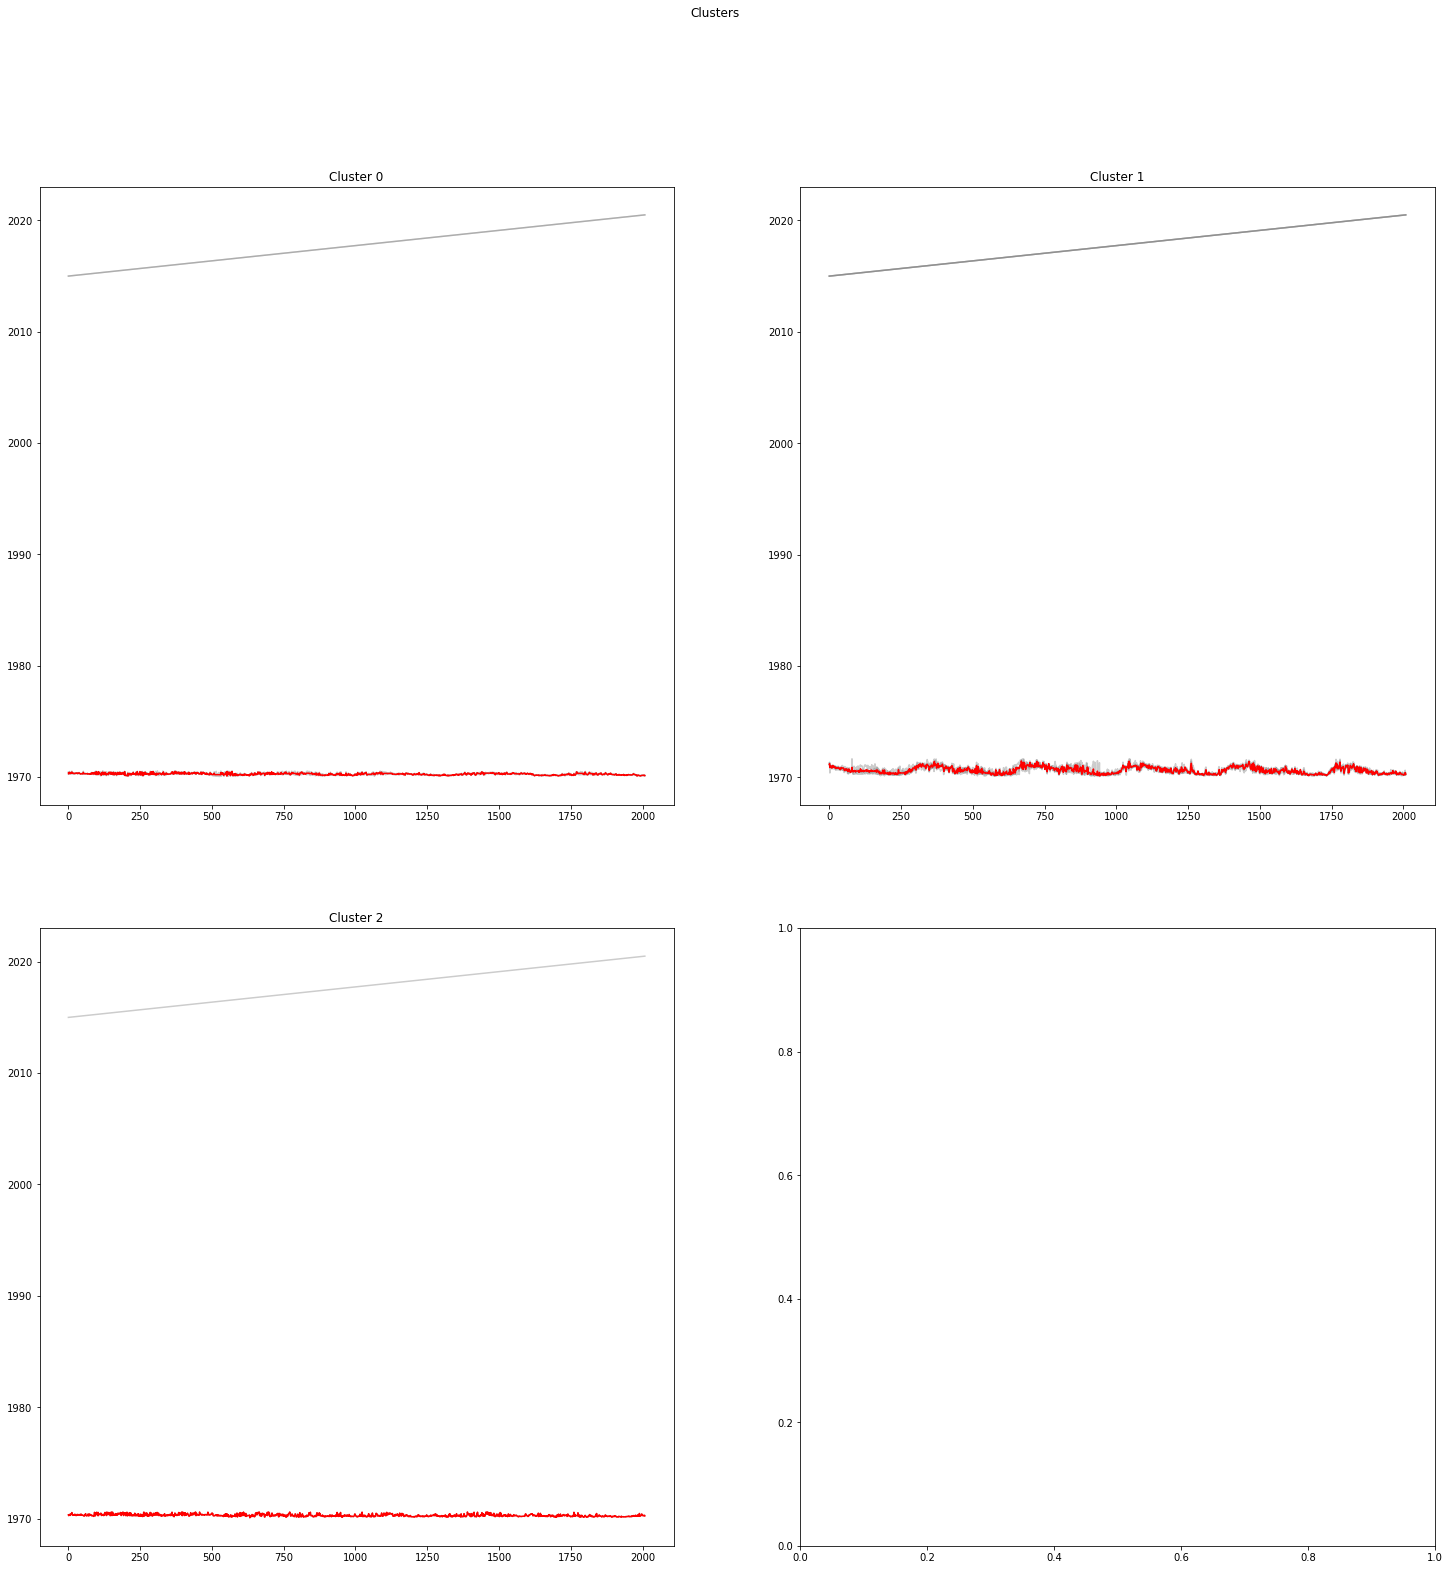

In [140]:
plot_count = math.ceil(math.sqrt(cluster_count))
som_x = som_y = math.ceil(math.sqrt(math.sqrt(len(tim_series))))
from tslearn.barycenters import dtw_barycenter_averaging

fig, axs = plt.subplots(plot_count,plot_count,figsize=(25,25))
fig.suptitle('Clusters')
row_i=0
column_j=0
# For each label there is,
# plots every series with that label
for label in set(labels):
    cluster = []
    for i in range(len(labels)):
            if(labels[i]==label):
                axs[row_i, column_j].plot(tim_series[i]['AQI'].reset_index(),c="gray",alpha=0.4)
                cluster.append(tim_series[i]['AQI'])
    if len(cluster) > 0:
         axs[row_i, column_j].plot(dtw_barycenter_averaging(np.vstack(cluster)),c="red")
    axs[row_i, column_j].set_title("Cluster "+str(row_i*som_y+column_j))
    column_j+=1
    if column_j%plot_count == 0:
        row_i+=1
        column_j=0
        
plt.show()
        

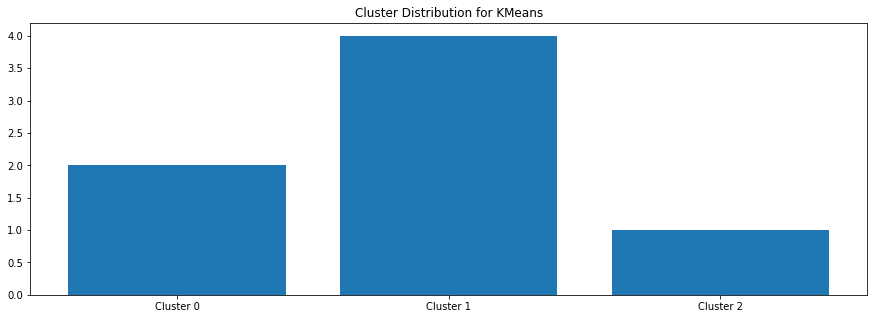

In [141]:
cluster_c = [len(labels[labels==i]) for i in range(cluster_count)]
cluster_n = ["Cluster "+str(i) for i in range(cluster_count)]
plt.figure(figsize=(15,5))
plt.title("Cluster Distribution for KMeans")
plt.bar(cluster_n,cluster_c)
plt.show()

In [142]:
tim_series

[              AQI
 2015-01-01   94.4
 2015-01-02   89.0
 2015-01-03   93.0
 2015-01-04   97.4
 2015-01-05  103.2
 ...           ...
 2020-06-27   51.0
 2020-06-28   61.0
 2020-06-29   65.0
 2020-06-30   63.0
 2020-07-01   43.0
 
 [2009 rows x 1 columns],
               AQI
 2015-01-01  122.8
 2015-01-02   99.2
 2015-01-03  105.2
 2015-01-04  114.2
 2015-01-05  118.0
 ...           ...
 2020-06-27   95.0
 2020-06-28   98.0
 2020-06-29  104.0
 2020-06-30  110.0
 2020-07-01   92.0
 
 [2009 rows x 1 columns],
               AQI
 2015-01-01  472.0
 2015-01-02  454.0
 2015-01-03  143.0
 2015-01-04  319.0
 2015-01-05  325.0
 ...           ...
 2020-06-27  112.0
 2020-06-28  196.0
 2020-06-29  233.0
 2020-06-30  114.0
 2020-07-01  101.0
 
 [2009 rows x 1 columns],
               AQI
 2015-01-01  418.5
 2015-01-02  451.5
 2015-01-03  435.5
 2015-01-04  384.0
 2015-01-05  374.5
 ...           ...
 2020-06-27  121.0
 2020-06-28  153.0
 2020-06-29  140.0
 2020-06-30  131.0
 2020-07-01  157.0
 
 [

In [143]:
fancy_names_for_labels = [f"Cluster {label}" for label in labels]
pd.DataFrame(zip(final_cit,fancy_names_for_labels),columns=["Series","Cluster"]).sort_values(by="Cluster").set_index("Series")

,Cluster
Series,
Bengaluru,Cluster 0
Hyderabad,Cluster 0
Delhi,Cluster 1
Gurugram,Cluster 1
Lucknow,Cluster 1
Patna,Cluster 1
Chennai,Cluster 2


#### As we have seen in EDA
#### Delhi, Gurugram, lucknow and patna are consitent top 5 mean AQI over all cities
#### Algo has segregated them with seperate cluster

In [144]:
#tim_T[0]

array([[1.        , 1.        , 1.        , ..., 0.05752212, 0.11061947,
        0.15707965]])

# Applying PCA and doing clustering again
#### For clustering time series we take data over evry unit time as seperate feature which makes no of columns huge for every city  
#### We're applying pca as  this dataset has 2009  features which is pretty huge(Curse of dimensionality)


In [145]:
data=np.array([d.values for d in tim_series]) 
reshaped_data = data.reshape((len(tim_series),2009))
tim_T=[i.T for i in mySeries]
transf_series=np.concatenate(tim_T)

In [146]:
from sklearn.decomposition import PCA
pca = PCA(n_components=4)
mySeries_transformed = pca.fit_transform(transf_series)

In [147]:
mySeries_transformed.shape
mySeries=tim_series

In [148]:
kmeans = KMeans(n_clusters=cluster_count,max_iter=5000)

labels = kmeans.fit_predict(mySeries_transformed)

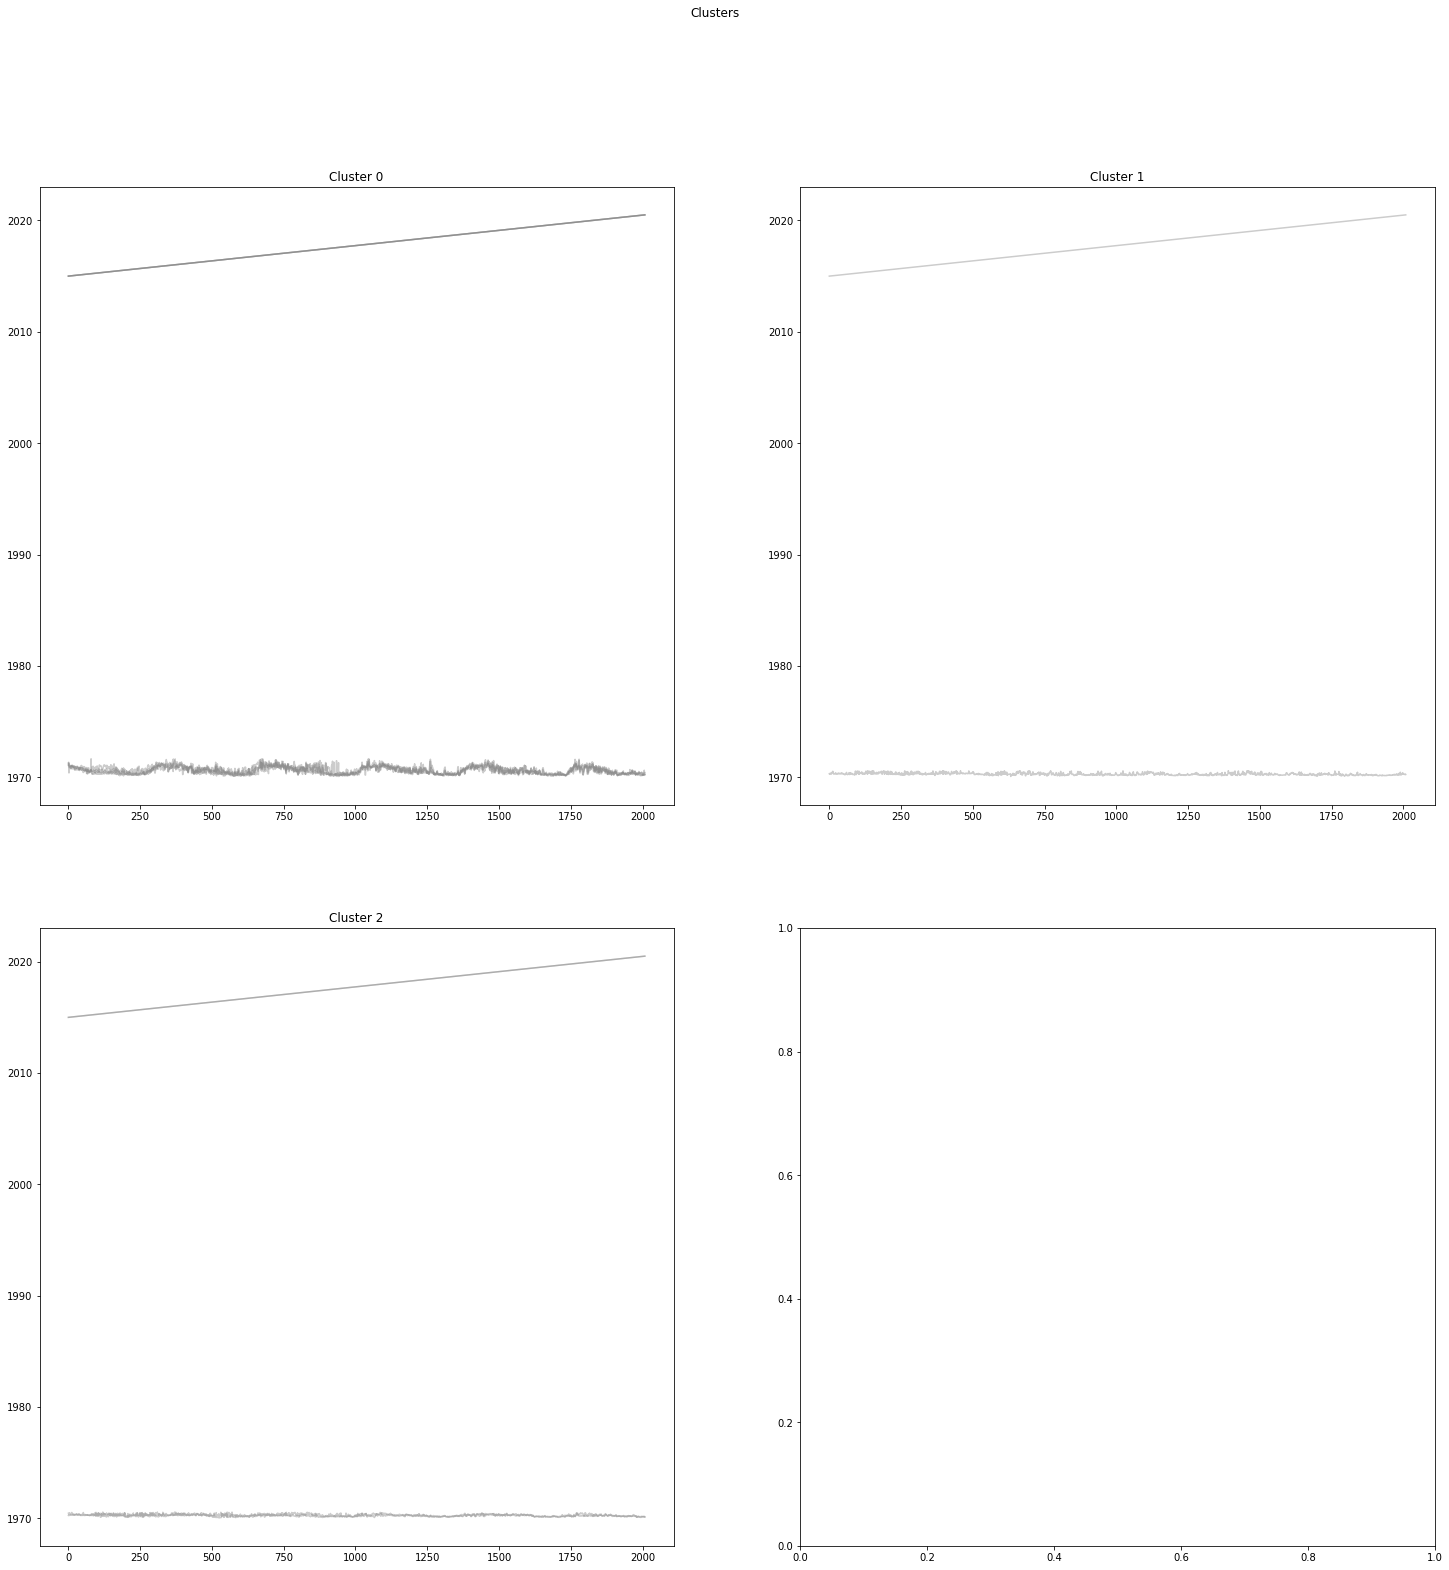

In [149]:
plot_count = math.ceil(math.sqrt(cluster_count))

fig, axs = plt.subplots(plot_count,plot_count,figsize=(25,25))
fig.suptitle('Clusters')
row_i=0
column_j=0
for label in set(labels):
    cluster = []
    for i in range(len(labels)):
            if(labels[i]==label):
                axs[row_i, column_j].plot(mySeries[i].reset_index(),c="gray",alpha=0.4)
                cluster.append(mySeries[i])
    if len(cluster) > 0:
        axs[row_i, column_j].plot(np.average(np.vstack(cluster),axis=0),c="red")
    axs[row_i, column_j].set_title("Cluster "+str(row_i*som_y+column_j))
    column_j+=1
    if column_j%plot_count == 0:
        row_i+=1
        column_j=0
        
plt.show()

In [150]:
fancy_names_for_labels = [f"Cluster {label}" for label in labels]
pd.DataFrame(zip(final_cit,fancy_names_for_labels),columns=["Series","Cluster"]).sort_values(by="Cluster").set_index("Series")

,Cluster
Series,
Delhi,Cluster 0
Gurugram,Cluster 0
Lucknow,Cluster 0
Patna,Cluster 0
Chennai,Cluster 1
Bengaluru,Cluster 2
Hyderabad,Cluster 2


#  Got same  results even  after applying PCA

#### 